In [1]:
#  firstly we preprocess the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 


##### firstly read and inspect the data

In [2]:

mydata = pd.read_csv('raw_fighter_details.csv')
mydata.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3596 entries, 0 to 3595
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fighter_name  3596 non-null   object 
 1   Height        3333 non-null   object 
 2   Weight        3522 non-null   object 
 3   Reach         1684 non-null   object 
 4   Stance        2792 non-null   object 
 5   DOB           2857 non-null   object 
 6   SLpM          3596 non-null   float64
 7   Str_Acc       3596 non-null   object 
 8   SApM          3596 non-null   float64
 9   Str_Def       3596 non-null   object 
 10  TD_Avg        3596 non-null   float64
 11  TD_Acc        3596 non-null   object 
 12  TD_Def        3596 non-null   object 
 13  Sub_Avg       3596 non-null   float64
dtypes: float64(4), object(10)
memory usage: 393.4+ KB


In [4]:
mydata.isnull().sum()

fighter_name       0
Height           263
Weight            74
Reach           1912
Stance           804
DOB              739
SLpM               0
Str_Acc            0
SApM               0
Str_Def            0
TD_Avg             0
TD_Acc             0
TD_Def             0
Sub_Avg            0
dtype: int64

In [5]:
# sb.pairplot(mydata)
mydata.describe()

,SLpM,SApM,TD_Avg,Sub_Avg
count,3596.000000,3596.000000,3596.000000,3596.000000
mean,2.279633,2.982948,1.211243,0.636707
std,1.901956,2.814008,1.914020,1.566843
min,0.000000,0.000000,0.000000,0.000000
25%,0.700000,1.400000,0.000000,0.000000
50%,2.170000,2.760000,0.510000,0.000000
75%,3.420000,4.002500,1.885000,0.800000
max,19.910000,52.500000,32.140000,21.900000


In [6]:
mydata.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


### Handling outliers

Making a copy of dataset to avoid altering the source dataset

In [7]:
# filling the nulls with dump value 0' 0"
# firstly making a clone of the data frame to avoid missing with the original dataframe
mydata_clone = mydata.copy(deep=True)

<Axes: ylabel='SLpM'>

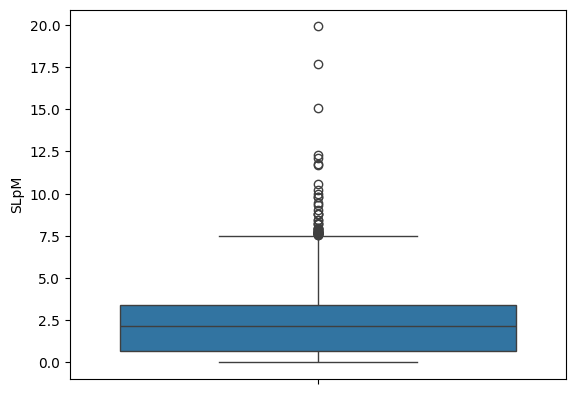

In [8]:
sb.boxplot(mydata_clone['SLpM'])

#### Filling the Nulls of Height column with zeros 
to not to have null problems when turning the string object data type of values to a number

In [9]:
mydata_clone['Height'] = mydata_clone['Height'].fillna("0' 0\"")
mydata_clone.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,"0' 0""",155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


Making the function that converts Height column string to normal number

In [10]:
def converting_height_to_cm(height_str):
    # Ensure the input is a string
    height_str = str(height_str)
    
    # Assigning two variables for the split
    feet, inches = height_str.split("'")
    
    # Extract the numerical values from both
    feet = float(feet)
    inches = float(inches.strip(' "'))
    
    # Turning both to cm
    feet_to_cm = feet * 30.48  # 1 foot = 30.48 cm
    inches_to_cm = inches * 2.54  # 1 inch = 2.54 cm
    
    # Returning the total
    total_cm = feet_to_cm + inches_to_cm
    return total_cm

print(mydata['Height'].dtypes)

object


applying the function to the clone data set

In [11]:
# height = mydata['Height']
# height
mydata['Height'].iloc[1]
# print(converting_height_to_cm(mydata['Height'].iloc[1]))

mydata_clone['Height'] = mydata_clone['Height'].apply(converting_height_to_cm)


You can see how is height column now is turned to normal number for further processing

In [12]:
mydata_clone.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,0.00,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,180.34,185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,190.50,235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,180.34,155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,167.64,145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


### Now turning the Weight Column to normal number

In [13]:
# now turnin the weight from ibs to numerica kgs
# firstly we remove the word then we make the numerical transformations

def pound_to_kg(Weight):
    Weight = str(Weight)
    Weight = Weight.strip(" lbs.")
    Weight = float(Weight)*0.4535924
    return Weight

mydata_clone['Weight'] = mydata_clone['Weight'].apply(pound_to_kg)
mydata_clone['Weight']
mydata_clone.head()
mydata_clone['Weight'].isnull().sum()
# mydata.head()


np.int64(74)

applying the weight function to the data set

In [14]:
def reach_to_number(reach):
    reach = str(reach)
    reach = reach.strip("\"")
    reach = float(reach)
    return reach
mydata_clone['Reach'] = mydata_clone['Reach'].apply(reach_to_number)
mydata_clone.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,0.00,70.306822,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,180.34,83.914594,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,190.50,106.594214,76.0,Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,180.34,70.306822,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,167.64,65.770898,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


#### dropping date of birth column, as it wont contribute much to the preprocessing

In [15]:
mydata_clone.drop(columns=['DOB'], inplace=True)

In [16]:
mydata_clone.head()

,fighter_name,Height,Weight,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,0.00,70.306822,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,180.34,83.914594,NaN,Southpaw,2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,190.50,106.594214,76.0,Orthodox,2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,180.34,70.306822,NaN,Orthodox,3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,167.64,65.770898,NaN,Orthodox,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [17]:
flag = 0
for i in mydata_clone['fighter_name']:
    # flag+=1
    if(i =='Khabib Nurmagomedov'):
        print(mydata_clone.loc[flag])
        khabib_data = mydata_clone.loc[flag]
    flag+=1
    # break

fighter_name    Khabib Nurmagomedov
Height                        177.8
Weight                    70.306822
Reach                          70.0
Stance                     Orthodox
SLpM                            4.1
Str_Acc                         48%
SApM                           1.75
Str_Def                         65%
TD_Avg                         5.32
TD_Acc                          48%
TD_Def                          84%
Sub_Avg                         0.8
Name: 2341, dtype: object


#### replacing the zero values in height column with nulls to fill it after dealing with weight classes

In [18]:
mydata_clone['Height'] = mydata_clone['Height'].replace(0 , np.nan ) 
count = 0 
# for i in mydata_clone['Height']:
#     if(i==0):  
#         count+=1
# print(count)
mydata_clone.isnull().sum()

fighter_name       0
Height           263
Weight            74
Reach           1912
Stance           804
SLpM               0
Str_Acc            0
SApM               0
Str_Def            0
TD_Avg             0
TD_Acc             0
TD_Def             0
Sub_Avg            0
dtype: int64

In [19]:
mydata_clone['Weight'].isnull().sum()

np.int64(74)

In [20]:
mydata_clone['Reach'].isnull().sum()

np.int64(1912)

In [21]:
mydata_clone.isnull().sum()

fighter_name       0
Height           263
Weight            74
Reach           1912
Stance           804
SLpM               0
Str_Acc            0
SApM               0
Str_Def            0
TD_Avg             0
TD_Acc             0
TD_Def             0
Sub_Avg            0
dtype: int64

# Weight classes Issue

In this preprocessing step, I worked with a dataset containing information about fighters and their attributes. One of the challenges I encountered was the absence of assigned weight classes for the fighters, as well as the unordered nature of the data.

To address this issue, I first sorted the fighters based on their attributes. Then, I implemented loops and conditional statements to categorize the fighters into their respective weight classes. This process resulted in the creation of a new column that indicates the weight class for each fighter, ensuring that the data is organized and meaningful for further analysis.


### Time to deal with weight classes

#### 1.sorting the dataframe based on the weight ascending

Sorting the DataFrame by weight in ascending order is a crucial step in the preprocessing phase. This organization allows for a clear and systematic approach to assigning weight classes to each fighter. By having the fighters sorted by weight, we can easily identify the appropriate weight class boundaries and ensure that each fighter is categorized correctly. This step not only enhances the accuracy of the data but also facilitates subsequent analysis and comparisons among fighters within the same weight class.


In [22]:
df_sorted = mydata_clone.copy(deep=True)
df_sorted = mydata_clone.sort_values(by='Weight')
df_sorted.head()

,fighter_name,Height,Weight,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
2697,Nicdali Rivera-Calanoc,160.02,47.627202,NaN,NaN,1.82,20%,2.42,78%,0.00,0%,0%,0.0
3166,Naho Sugiyuma,154.94,47.627202,NaN,NaN,2.59,48%,2.45,71%,2.05,100%,66%,0.0
1030,Megumi Fujii,160.02,51.255941,NaN,NaN,2.40,42%,0.00,100%,0.00,0%,0%,12.0
247,Karla Benitez,160.02,51.255941,NaN,NaN,0.00,0%,2.40,57%,0.00,0%,100%,0.0
107,Jessica Andrade,154.94,52.163126,62.0,Orthodox,6.38,49%,5.26,53%,3.11,57%,76%,0.4


In [23]:

# df_sorted = df_sorted.dropna(subset='Weight')
df_sorted = df_sorted.sort_values(by='Weight')
df_sorted

,fighter_name,Height,Weight,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
2697,Nicdali Rivera-Calanoc,160.02,47.627202,NaN,NaN,1.82,20%,2.42,78%,0.00,0%,0%,0.0
3166,Naho Sugiyuma,154.94,47.627202,NaN,NaN,2.59,48%,2.45,71%,2.05,100%,66%,0.0
1030,Megumi Fujii,160.02,51.255941,NaN,NaN,2.40,42%,0.00,100%,0.00,0%,0%,12.0
247,Karla Benitez,160.02,51.255941,NaN,NaN,0.00,0%,2.40,57%,0.00,0%,100%,0.0
1340,Felice Herrig,162.56,52.163126,65.0,Orthodox,3.63,36%,4.84,49%,1.18,30%,72%,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,Carl Toomey,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3413,Jeremy Wallace,175.26,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3488,Karl Willis,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3503,Ray Wizard,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0


### making a new index after the original one was altered in the ordering step

In [24]:
df_sorted = df_sorted.reset_index()
df_sorted.head()

,index,fighter_name,Height,Weight,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,2697,Nicdali Rivera-Calanoc,160.02,47.627202,NaN,NaN,1.82,20%,2.42,78%,0.00,0%,0%,0.0
1,3166,Naho Sugiyuma,154.94,47.627202,NaN,NaN,2.59,48%,2.45,71%,2.05,100%,66%,0.0
2,1030,Megumi Fujii,160.02,51.255941,NaN,NaN,2.40,42%,0.00,100%,0.00,0%,0%,12.0
3,247,Karla Benitez,160.02,51.255941,NaN,NaN,0.00,0%,2.40,57%,0.00,0%,100%,0.0
4,1340,Felice Herrig,162.56,52.163126,65.0,Orthodox,3.63,36%,4.84,49%,1.18,30%,72%,0.9


## filling whatever we can fill from other dataset that have matches information 

there are two other match datasets, one is preprocessed previously preprocessed this doesn't have the names, and one that is raw but have the names.
the plan here is to assign names with there attributes to the preprocessed data sets, however the every fighter should have his attributes and not the attributes of someone else.

In [25]:
# large fighter data = Match_data
Match_data = pd.read_csv('data.csv')
Match_data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


Reading the reach column

In [26]:
Match_data['B_Reach_cms'].head()

0    170.18
1    193.04
2    190.50
3    154.94
4    182.88
Name: B_Reach_cms, dtype: float64

#### Adding fighers name into preprocessed match data

In [27]:
previously_preprocessed_Match_data = pd.read_csv('preprocessed_data.csv')
Match_data2 = previously_preprocessed_Match_data
Match_data2.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


#### This step needs to be fixed ** important **

In [28]:
Match_data2['name_red'] = Match_data['R_fighter']
Match_data2['name_blue'] = Match_data['B_fighter']
# Match_data['R_fighter'].head()
Match_data2.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch,name_red,name_blue
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,0,0,0,1,0,0,0,Adrian Yanez,Gustavo Lopez
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,0,0,0,1,0,0,0,Trevin Giles,Roman Dolidze
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,0,0,0,1,0,Tai Tuivasa,Harry Hunsucker
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,1,Cheyanne Buys,Montserrat Conejo
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,0,0,0,1,0,0,0,Marion Reneau,Macy Chiasson


In [29]:
Match_data2['R_Reach_cms'].isnull().sum()

np.int64(0)

In [30]:
Match_data2.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch,name_red,name_blue
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,0,0,0,1,0,0,0,Adrian Yanez,Gustavo Lopez
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,0,0,0,1,0,0,0,Trevin Giles,Roman Dolidze
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,0,0,0,1,0,Tai Tuivasa,Harry Hunsucker
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,1,Cheyanne Buys,Montserrat Conejo
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,0,0,0,1,0,0,0,Marion Reneau,Macy Chiasson


In [31]:
Match_data2.iloc[:, 0:2]

,Winner,title_bout
0,Red,False
1,Red,False
2,Red,False
3,Blue,False
4,Blue,False
...,...,...
5897,Red,False
5898,Red,False
5899,Red,False
5900,Red,False


getting the last two columns in the front so that the names of fighters are in the front

In [32]:
cols = Match_data2.columns[-2:].tolist() + Match_data2.columns[:-2].tolist()
Match_data2 = Match_data2[cols]
Match_data2.head()

,name_red,name_blue,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Adrian Yanez,Gustavo Lopez,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,...,0,1,0,0,0,0,1,0,0,0
1,Trevin Giles,Roman Dolidze,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,...,0,1,0,0,0,0,1,0,0,0
2,Tai Tuivasa,Harry Hunsucker,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,...,0,1,0,0,0,0,0,0,1,0
3,Cheyanne Buys,Montserrat Conejo,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,...,0,0,0,1,0,0,0,0,0,1
4,Marion Reneau,Macy Chiasson,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,...,0,1,0,0,0,0,1,0,0,0


In [33]:
# df_sorted['Reach'].isnull().sum()
df_sorted.iloc[300:1000]

,index,fighter_name,Height,Weight,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
300,691,Cindy Dandois,170.18,61.234974,NaN,Orthodox,3.13,32%,3.40,58%,5.00,55%,0%,0.0
301,697,Eduardo Dantas,177.80,61.234974,NaN,NaN,3.33,60%,3.00,60%,4.00,23%,100%,0.0
302,2017,Sabina Mazo,170.18,61.234974,70.0,Orthodox,6.56,44%,3.91,60%,0.81,80%,66%,0.2
303,37,John Albert,172.72,61.234974,68.0,Orthodox,3.05,49%,2.82,35%,0.00,0%,50%,6.1
304,44,Iuri Alcantara,175.26,61.234974,71.0,Southpaw,2.72,45%,2.79,49%,1.44,62%,60%,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1159,Jared Gordon,175.26,65.770898,68.0,Orthodox,5.54,56%,3.22,60%,2.81,39%,55%,0.0
996,1199,Tyson Griffin,167.64,65.770898,68.0,Orthodox,3.71,41%,2.30,65%,1.87,46%,59%,0.9
997,1202,Matt Grice,172.72,65.770898,70.0,Orthodox,4.09,53%,2.69,56%,2.19,37%,82%,0.5
998,1208,Jordan Griffin,177.80,65.770898,73.0,Southpaw,2.60,46%,3.18,48%,0.78,23%,42%,1.8


In [34]:
df_sorted.iloc[0:10]

,index,fighter_name,Height,Weight,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,2697,Nicdali Rivera-Calanoc,160.02,47.627202,NaN,NaN,1.82,20%,2.42,78%,0.00,0%,0%,0.0
1,3166,Naho Sugiyuma,154.94,47.627202,NaN,NaN,2.59,48%,2.45,71%,2.05,100%,66%,0.0
2,1030,Megumi Fujii,160.02,51.255941,NaN,NaN,2.40,42%,0.00,100%,0.00,0%,0%,12.0
3,247,Karla Benitez,160.02,51.255941,NaN,NaN,0.00,0%,2.40,57%,0.00,0%,100%,0.0
4,1340,Felice Herrig,162.56,52.163126,65.0,Orthodox,3.63,36%,4.84,49%,1.18,30%,72%,0.9
5,3272,Tecia Torres,154.94,52.163126,60.0,Orthodox,4.30,47%,3.37,62%,0.68,15%,56%,0.1
6,1853,Loma Lookboonmee,154.94,52.163126,61.0,Orthodox,5.16,55%,3.09,59%,0.67,25%,72%,0.0
7,1794,Amanda Lemos,162.56,52.163126,65.0,Southpaw,6.21,64%,5.39,45%,1.98,100%,100%,0.5
8,906,Carla Esparza,154.94,52.163126,63.0,Orthodox,2.29,42%,2.85,53%,3.44,35%,48%,0.3
9,425,Cheyanne Buys,160.02,52.163126,63.0,Switch,4.10,53%,1.67,65%,0.00,0%,60%,0.0


In [35]:
df_sorted.loc[0:10]

,index,fighter_name,Height,Weight,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,2697,Nicdali Rivera-Calanoc,160.02,47.627202,NaN,NaN,1.82,20%,2.42,78%,0.00,0%,0%,0.0
1,3166,Naho Sugiyuma,154.94,47.627202,NaN,NaN,2.59,48%,2.45,71%,2.05,100%,66%,0.0
2,1030,Megumi Fujii,160.02,51.255941,NaN,NaN,2.40,42%,0.00,100%,0.00,0%,0%,12.0
3,247,Karla Benitez,160.02,51.255941,NaN,NaN,0.00,0%,2.40,57%,0.00,0%,100%,0.0
4,1340,Felice Herrig,162.56,52.163126,65.0,Orthodox,3.63,36%,4.84,49%,1.18,30%,72%,0.9
5,3272,Tecia Torres,154.94,52.163126,60.0,Orthodox,4.30,47%,3.37,62%,0.68,15%,56%,0.1
6,1853,Loma Lookboonmee,154.94,52.163126,61.0,Orthodox,5.16,55%,3.09,59%,0.67,25%,72%,0.0
7,1794,Amanda Lemos,162.56,52.163126,65.0,Southpaw,6.21,64%,5.39,45%,1.98,100%,100%,0.5
8,906,Carla Esparza,154.94,52.163126,63.0,Orthodox,2.29,42%,2.85,53%,3.44,35%,48%,0.3
9,425,Cheyanne Buys,160.02,52.163126,63.0,Switch,4.10,53%,1.67,65%,0.00,0%,60%,0.0


In [36]:
Match_data2.head()

,name_red,name_blue,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Adrian Yanez,Gustavo Lopez,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,...,0,1,0,0,0,0,1,0,0,0
1,Trevin Giles,Roman Dolidze,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,...,0,1,0,0,0,0,1,0,0,0
2,Tai Tuivasa,Harry Hunsucker,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,...,0,1,0,0,0,0,0,0,1,0
3,Cheyanne Buys,Montserrat Conejo,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,...,0,0,0,1,0,0,0,0,0,1
4,Marion Reneau,Macy Chiasson,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,...,0,1,0,0,0,0,1,0,0,0


renaming height to height_cm and weight to weight_kg

In [37]:
df_sorted = df_sorted.rename(columns={'Height':'Height_cm', 'Weight':'Weight_kg'})

### **making two lists for both red and blue sides, which have fighters names, using the name as a flag to know the fighters who share the two data sets**
##### using these lists to make one uniquly named list that is gonna be used to fill the missing values from the large data set to the small one

In [38]:
# how to check the index that have null values and assign them with the value of the same fighter in the other data set?
flag = False
list_red = []
list_blue = []
for i in df_sorted['fighter_name']:
    for j in Match_data2['name_red']:
        if (i == j):
            flag = True
            list_red.append(i)
        
for i in df_sorted['fighter_name']:
    for j in Match_data2['name_blue']:
        if (i == j):
            flag = True
            list_blue.append(i)            
list_red
            

['Felice Herrig',
 'Felice Herrig',
 'Felice Herrig',
 'Felice Herrig',
 'Felice Herrig',
 'Felice Herrig',
 'Tecia Torres',
 'Tecia Torres',
 'Tecia Torres',
 'Tecia Torres',
 'Tecia Torres',
 'Tecia Torres',
 'Tecia Torres',
 'Tecia Torres',
 'Tecia Torres',
 'Tecia Torres',
 'Loma Lookboonmee',
 'Loma Lookboonmee',
 'Loma Lookboonmee',
 'Amanda Lemos',
 'Carla Esparza',
 'Carla Esparza',
 'Carla Esparza',
 'Carla Esparza',
 'Carla Esparza',
 'Carla Esparza',
 'Carla Esparza',
 'Carla Esparza',
 'Carla Esparza',
 'Carla Esparza',
 'Cheyanne Buys',
 'Emily Kagan',
 'Marina Rodriguez',
 'Marina Rodriguez',
 'Marina Rodriguez',
 'Jocelyn Jones-Lybarger',
 'Jamie Moyle',
 'Joanna Jedrzejczyk',
 'Joanna Jedrzejczyk',
 'Joanna Jedrzejczyk',
 'Joanna Jedrzejczyk',
 'Joanna Jedrzejczyk',
 'Joanna Jedrzejczyk',
 'Joanna Jedrzejczyk',
 'Joanna Jedrzejczyk',
 'Virna Jandiroba',
 'Livinha Souza',
 'Livinha Souza',
 'Livinha Souza',
 'Livinha Souza',
 'Izabela Badurek',
 'Danielle Taylor',
 'Dani

makeing the values of the two lists distinct

In [39]:
list_red = list(set(list_red))
list_blue = list(set(list_blue))

In [40]:
print(len(list_red))
len(list_blue)
print(f'overall length of the two lists are = {len(list_red) + len(list_blue)} ')

1484
overall length of the two lists are = 3402 


### so now I have the **lists** containing the fighers who are present in both big data frame and the small data frame


**we have to merge the two lists** 

In [41]:
list_of_common = list_red + list_blue
# list_of_common
df_of_common = pd.DataFrame

making a data frame of that list

In [42]:
df_of_common = pd.DataFrame(index=range(len(list_of_common)))


df_of_common['names'] = list_of_common

however in the the raw_fighter_data set, there are fighters that doesn't exist, and so I can't fill their values, so I have to find them and drop them

In [43]:
# i have to clean the fighters that are not common in the df_sorted
# dropping their entire record and leaving only the common fighters
# we do it using nested for loop to check and drop based on a flag
flag = False
flag2 = 0
counter = 0
for i in df_sorted['fighter_name']:
    for j in df_of_common['names']:
        if(i == j):
            flag = True
            break
    if not flag:
        flag2+=1
        # df_sorted.drop(i)
        df_sorted.drop(counter, inplace=True)
        print(i)
        
    counter+=1
# flag2
        
            

Nicdali Rivera-Calanoc
Naho Sugiyuma
Megumi Fujii
Karla Benitez


### Filling the reach from the match dataframe to our main data frame
#### Two for loops for both red and blue columns in the large data set, filling the missing reach with the reach in the large data set

In [44]:
# for blue
counter = 0
for i in df_sorted['Reach']:
    if i == 0:  # Check if Reach is 0
        # Find the matching fighter name in Match_data2
        for flagger, name in enumerate(Match_data2['name_blue']):
            if df_sorted['fighter_name'][counter] == name:
                # Replace the Reach value in df_sorted with the one from Match_data2
                df_sorted['Reach'][counter] = Match_data2['B_Reach_cms'][flagger]
                break  # Exit once the match is found and the value is updated
    counter += 1

# print(df_sorted)




In [45]:
# for red
counter = 0
for i in df_sorted['Reach']:
    if i == 0:  # Check if Reach is 0
        # Find the matching fighter name in Match_data2
        for flagger, name in enumerate(Match_data2['name_red']):
            if df_sorted['fighter_name'][counter] == name:
                # Replace the Reach value in df_sorted with the one from Match_data2
                df_sorted['Reach'][counter] = Match_data2['R_Reach_cms'][flagger]
                break  # Exit once the match is found and the value is updated
    counter += 1


#### locating a figher's reach to check if it was filled

#### spotting a null valued reach figher to check on

In [46]:
spotter = 0 

for i in Match_data2['name_blue']:
    if (i == "Emily Kagan"):
        print(Match_data2['B_Reach_cms'][spotter])
        print(i)
        break
    spotter+=1
print(spotter)


167.64
Emily Kagan
2558


In [47]:
counter = 0
for i in df_sorted['Reach']:
    if(i == 0):
        print(df_sorted['fighter_name'][counter], '\t', df_sorted['Reach'][counter])
    counter+=1

### this step is also necessary for assigning every fighter his/her weight class he should've he weight in the first place
if a fighter doesn't have a weight then he will be one of those: 
1. Inactive or Idle: The fighter may not currently be competing or may be inactive for a period of time. This could be due to personal reasons, injuries, or other commitments.
2. Transitioning Between Weight Classes: The fighter might be in the process of moving between weight classes, which could lead to a temporary lack of a defined weight.
3. New Fighter: If the fighter is new to the sport or organization, they may not have had an official weigh-in yet, resulting in no weight being recorded.
4. Data Entry Error: It’s possible that the absence of a weight is simply due to a data entry error or oversight during data collection.
5. Retirement or Departure: The fighter may have retired or left the sport, which could lead to their information being incomplete or outdated.
6. Pending Weigh-In: The fighter might be scheduled for a weigh-in in the near future, and their weight has not yet been recorded.
7. Regulatory Issues: There could be regulatory or administrative reasons for the lack of a weight, such as pending medical evaluations or compliance with weight-related regulations.

""" and for these reasons we have to drop him and there is no way we can fill his weight value """

In [48]:
df_sorted = df_sorted.dropna(subset='Weight_kg')

In [49]:
df_sorted['Weight_kg'].isna().sum()

np.int64(0)

In [50]:
df_sorted = df_sorted.replace('0%',np.nan)
# df_sorted['Str_Acc'].info()

In [51]:
df_sorted['TD_Def'].isna().sum()

np.int64(1298)

In [52]:
df_sorted['TD_Acc'].isna().sum()

np.int64(1505)

In [53]:
df_sorted['SApM'].isna().sum()

np.int64(0)

In [54]:
df_sorted['TD_Avg'].isna().sum()

np.int64(0)

In [55]:
df_sorted

,index,fighter_name,Height_cm,Weight_kg,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
4,1340,Felice Herrig,162.56,52.163126,65.0,Orthodox,3.63,36%,4.84,49%,1.18,30%,72%,0.9
5,3272,Tecia Torres,154.94,52.163126,60.0,Orthodox,4.30,47%,3.37,62%,0.68,15%,56%,0.1
6,1853,Loma Lookboonmee,154.94,52.163126,61.0,Orthodox,5.16,55%,3.09,59%,0.67,25%,72%,0.0
7,1794,Amanda Lemos,162.56,52.163126,65.0,Southpaw,6.21,64%,5.39,45%,1.98,100%,100%,0.5
8,906,Carla Esparza,154.94,52.163126,63.0,Orthodox,2.29,42%,2.85,53%,3.44,35%,48%,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,2515,Cory Peterson,210.82,181.436960,NaN,Orthodox,2.17,60%,6.51,40%,0.00,NaN,NaN,0.0
3518,2004,John Matua,187.96,181.436960,NaN,Orthodox,0.00,NaN,0.00,NaN,0.00,NaN,NaN,0.0
3519,2613,Thomas Ramirez,185.42,185.972884,NaN,Sideways,0.00,NaN,0.00,NaN,0.00,NaN,NaN,0.0
3520,3299,Teila Tuli,182.88,195.044732,NaN,Orthodox,0.00,NaN,0.00,NaN,0.00,NaN,NaN,0.0


#### checking for the weight classes in kg instead of pounds, to use the number as weight_kg thresholds for every weight class 

In [56]:
x = [115,125,135,145,155,170,185,205,265]
for i in x:
    print(i*0.4535924)

52.163126
56.69905
61.234974
65.770898
70.306822
77.110708
83.91459400000001
92.986442
120.201986


#### Defining the weight claesses for every fighter

In [57]:
# Define weight class ranges
def get_weight_class(weight):
    if weight < 53:
        return 'Straw Weight'
    elif 52 <= weight < 56:
        return 'FlyWeight'
    elif 56 <= weight < 61:
        return 'Bantam Weight'
    elif 61 <= weight < 70:
        return 'Lightweight'
    elif 70 <= weight < 84:
        return 'Middleweight'
    elif 84 <= weight < 93:
        return 'Light Heavyweight'
    elif 93 <= weight <= 120:
        return 'Heavyweight'
    else:
        return 'Super Heavyweight'

# Apply weight classes to create a new column
df_sorted['weight_class'] = df_sorted['Weight_kg'].apply(get_weight_class)

# Calculate the average reach for each weight class, ignoring NaN values
average_reach_per_class = df_sorted.groupby('weight_class')['Reach'].mean()

# Display the results
# print(average_reach_per_class)
average_reach_per_class

weight_class
Bantam Weight        66.731034
Heavyweight          76.878505
Light Heavyweight    75.925676
Lightweight          69.553288
Middleweight         73.143426
Straw Weight         63.545455
Super Heavyweight    78.041667
Name: Reach, dtype: float64

In [58]:
# df_sorted['weight_class'].iloc[90:120]
for i in df_sorted['weight_class']:
    if(i == 'FlyWeight'):
        print(i)

### this is for getting the reach avg within every single weight class

In [59]:
average_reach_by_class = []
something = 0
# Loop through unique weight classes in the DataFrame
for weight_class in df_sorted['weight_class'].unique():
    # Calculate the mean reach for the current weight class
    avg_reach = df_sorted[df_sorted['weight_class'] == weight_class]['Reach'].mean()
    # Fill NaN values in the 'Reach' column for the current weight class with avg_reach
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'Reach'] = df_sorted[df_sorted['weight_class'] == weight_class]['Reach'].fillna(avg_reach)
    # Append a tuple with weight class and its average reach to the list
    average_reach_by_class.append((weight_class, avg_reach))

In [60]:
# df_sorted[df_sorted['weight_class'] == 'Straw Weight']
# average_reach_by_class
for i in average_reach_by_class:
    print(i)

('Straw Weight', np.float64(63.54545454545455))
('Bantam Weight', np.float64(66.73103448275862))
('Lightweight', np.float64(69.55328798185941))
('Middleweight', np.float64(73.14342629482071))
('Light Heavyweight', np.float64(75.92567567567568))
('Heavyweight', np.float64(76.8785046728972))
('Super Heavyweight', np.float64(78.04166666666667))


This is for getting the unique (distinct) values of weight class column

In [61]:
print(set(df_sorted['weight_class']))

{'Heavyweight', 'Super Heavyweight', 'Lightweight', 'Middleweight', 'Straw Weight', 'Light Heavyweight', 'Bantam Weight'}


In [62]:
# df_sorted['Reach'].iloc[1050:1600]
df_sorted['Reach'].isna().sum()

np.int64(0)

In [63]:
# now I have to do the same for other columns with missing values
df_sorted.head()

,index,fighter_name,Height_cm,Weight_kg,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,weight_class
4,1340,Felice Herrig,162.56,52.163126,65.0,Orthodox,3.63,36%,4.84,49%,1.18,30%,72%,0.9,Straw Weight
5,3272,Tecia Torres,154.94,52.163126,60.0,Orthodox,4.30,47%,3.37,62%,0.68,15%,56%,0.1,Straw Weight
6,1853,Loma Lookboonmee,154.94,52.163126,61.0,Orthodox,5.16,55%,3.09,59%,0.67,25%,72%,0.0,Straw Weight
7,1794,Amanda Lemos,162.56,52.163126,65.0,Southpaw,6.21,64%,5.39,45%,1.98,100%,100%,0.5,Straw Weight
8,906,Carla Esparza,154.94,52.163126,63.0,Orthodox,2.29,42%,2.85,53%,3.44,35%,48%,0.3,Straw Weight


#### converting reach and weight into integers

In [64]:
df_sorted['Reach'] = df_sorted['Reach'].astype(int)
df_sorted['Weight_kg'] = df_sorted['Weight_kg'].astype(int)
df_sorted.head()

,index,fighter_name,Height_cm,Weight_kg,Reach,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,weight_class
4,1340,Felice Herrig,162.56,52,65,Orthodox,3.63,36%,4.84,49%,1.18,30%,72%,0.9,Straw Weight
5,3272,Tecia Torres,154.94,52,60,Orthodox,4.30,47%,3.37,62%,0.68,15%,56%,0.1,Straw Weight
6,1853,Loma Lookboonmee,154.94,52,61,Orthodox,5.16,55%,3.09,59%,0.67,25%,72%,0.0,Straw Weight
7,1794,Amanda Lemos,162.56,52,65,Southpaw,6.21,64%,5.39,45%,1.98,100%,100%,0.5,Straw Weight
8,906,Carla Esparza,154.94,52,63,Orthodox,2.29,42%,2.85,53%,3.44,35%,48%,0.3,Straw Weight


In [65]:
df_sorted = df_sorted.rename(columns={'Reach':'Reach_cm','Str_Acc':'Str_Acc%', 'SApM':'Strikes_absorbed/m', 'TD_Acc':'TD_Acc%', 'Str_Def':'Str_Def%', 'TD_Def':'TD_Def%'})


#### percentage to numerical conversion

In [66]:
def percentage_to_nom(nom):
    if pd.isna(nom):
        return nom 
    else:
        nom = str(nom)
        nom = nom.strip('%')
        # nom = float(nom)*100
        nom = float(nom)
        return nom 

In [67]:
df_sorted.isnull().sum()

index                    0
fighter_name             0
Height_cm              195
Weight_kg                0
Reach_cm                 0
Stance                 735
SLpM                     0
Str_Acc%               660
Strikes_absorbed/m       0
Str_Def%               606
TD_Avg                   0
TD_Acc%               1505
TD_Def%               1298
Sub_Avg                  0
weight_class             0
dtype: int64

In [68]:
df_sorted.head()

,index,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Acc%,TD_Def%,Sub_Avg,weight_class
4,1340,Felice Herrig,162.56,52,65,Orthodox,3.63,36%,4.84,49%,1.18,30%,72%,0.9,Straw Weight
5,3272,Tecia Torres,154.94,52,60,Orthodox,4.30,47%,3.37,62%,0.68,15%,56%,0.1,Straw Weight
6,1853,Loma Lookboonmee,154.94,52,61,Orthodox,5.16,55%,3.09,59%,0.67,25%,72%,0.0,Straw Weight
7,1794,Amanda Lemos,162.56,52,65,Southpaw,6.21,64%,5.39,45%,1.98,100%,100%,0.5,Straw Weight
8,906,Carla Esparza,154.94,52,63,Orthodox,2.29,42%,2.85,53%,3.44,35%,48%,0.3,Straw Weight


In [70]:
df_sorted['Str_Acc%'] = df_sorted['Str_Acc%'].apply(percentage_to_nom)
df_sorted['Str_Def%'] = df_sorted['Str_Def%'].apply(percentage_to_nom)
df_sorted['TD_Acc'] = df_sorted['TD_Acc%'].apply(percentage_to_nom)
df_sorted['TD_Def%'] = df_sorted['TD_Def%'].apply(percentage_to_nom)

#### Filling every other numerical column with the same way we filled reach

In [72]:
average_SLpM_by_class = []
average_TD_Avg_by_class = []
average_Sub_Avg_by_class = []
average_TD_Def_by_class = []
average_TD_Acc_by_class = []
average_Str_Def_by_class = []
average_Str_Acc_by_class = []

# Loop through unique weight classes in the DataFrame
for weight_class in df_sorted['weight_class'].unique():
    # Calculate the mean for each column for the current weight class
    avg_SLpM = df_sorted[df_sorted['weight_class'] == weight_class]['SLpM'].mean()
    avg_TD_Avg = df_sorted[df_sorted['weight_class'] == weight_class]['TD_Avg'].mean()
    avg_Sub_Avg = df_sorted[df_sorted['weight_class'] == weight_class]['Sub_Avg'].mean()
    avg_TD_Def = df_sorted[df_sorted['weight_class'] == weight_class]['TD_Def%'].mean()
    avg_TD_Acc = df_sorted[df_sorted['weight_class'] == weight_class]['TD_Acc'].mean()
    avg_Str_Def = df_sorted[df_sorted['weight_class'] == weight_class]['Str_Def%'].mean()
    avg_Str_Acc = df_sorted[df_sorted['weight_class'] == weight_class]['Str_Acc%'].mean()

    # Fill NaN values in each column for the current weight class
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'SLpM'] = df_sorted[df_sorted['weight_class'] == weight_class]['SLpM'].fillna(round(avg_SLpM, 2))
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'TD_Avg'] = df_sorted[df_sorted['weight_class'] == weight_class]['TD_Avg'].fillna(round(avg_TD_Avg, 2))
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'Sub_Avg'] = df_sorted[df_sorted['weight_class'] == weight_class]['Sub_Avg'].fillna(round(avg_Sub_Avg, 2))
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'TD_Def%'] = df_sorted[df_sorted['weight_class'] == weight_class]['TD_Def%'].fillna(round(avg_TD_Def, 2))
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'TD_Acc'] = df_sorted[df_sorted['weight_class'] == weight_class]['TD_Acc'].fillna(round(avg_TD_Acc, 2))
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'Str_Def%'] = df_sorted[df_sorted['weight_class'] == weight_class]['Str_Def%'].fillna(round(avg_Str_Def, 2))
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'Str_Acc%'] = df_sorted[df_sorted['weight_class'] == weight_class]['Str_Acc%'].fillna(round(avg_Str_Acc, 2))
    
    # Append tuples with weight class and average values to the respective lists
    average_SLpM_by_class.append((weight_class, avg_SLpM))
    average_TD_Avg_by_class.append((weight_class, avg_TD_Avg))
    average_Sub_Avg_by_class.append((weight_class, avg_Sub_Avg))
    average_TD_Def_by_class.append((weight_class, avg_TD_Def))
    average_TD_Acc_by_class.append((weight_class, avg_TD_Acc))
    average_Str_Def_by_class.append((weight_class, avg_Str_Def))
    average_Str_Acc_by_class.append((weight_class, avg_Str_Acc))

# Display the lists of average values
print("Average SLpM by class:", average_SLpM_by_class)
print("Average TD_Avg by class:", average_TD_Avg_by_class)
print("Average Sub_Avg by class:", average_Sub_Avg_by_class)
print("Average TD_Def by class:", average_TD_Def_by_class)
print("Average TD_Acc by class:", average_TD_Acc_by_class)
print("Average Str_Def by class:", average_Str_Def_by_class)
print("Average Str_Acc by class:", average_Str_Acc_by_class)


Average SLpM by class: [('Straw Weight', np.float64(3.41906976744186)), ('Bantam Weight', np.float64(2.872975609756098)), ('Lightweight', np.float64(2.604503144654088)), ('Middleweight', np.float64(2.250534927627439)), ('Light Heavyweight', np.float64(2.048413098236776)), ('Heavyweight', np.float64(1.816283185840708)), ('Super Heavyweight', np.float64(2.003644859813084))]
Average TD_Avg by class: [('Straw Weight', np.float64(1.206627906976744)), ('Bantam Weight', np.float64(1.2204878048780488)), ('Lightweight', np.float64(1.293798742138365)), ('Middleweight', np.float64(1.3070610446821902)), ('Light Heavyweight', np.float64(1.0916372795969773)), ('Heavyweight', np.float64(1.0593510324483777)), ('Super Heavyweight', np.float64(0.8376635514018691))]
Average Sub_Avg by class: [('Straw Weight', np.float64(0.5372093023255814)), ('Bantam Weight', np.float64(0.6019512195121951)), ('Lightweight', np.float64(0.6104402515723272)), ('Middleweight', np.float64(0.6935808684707363)), ('Light Heavywe

In [73]:
# List to store average height by weight class (optional)
average_height_by_class = []

# Loop through unique weight classes in the DataFrame
for weight_class in df_sorted['weight_class'].unique():
    # Calculate the mean height for the current weight class
    avg_height = df_sorted[df_sorted['weight_class'] == weight_class]['Height_cm'].mean()
    
    # Fill NaN values in the 'Height' column for the current weight class with avg_height
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'Height_cm'] = df_sorted[df_sorted['weight_class'] == weight_class]['Height_cm'].fillna(round(avg_height, 2))
    
    # Append the weight class and average height to the list (optional)
    average_height_by_class.append((weight_class, avg_height))

# Display the list of average heights (optional)
print("Average height by class:", average_height_by_class)


Average height by class: [('Straw Weight', np.float64(161.41095238095235)), ('Bantam Weight', np.float64(166.76767676767676)), ('Lightweight', np.float64(172.22275132275132)), ('Middleweight', np.float64(180.02550744248987)), ('Light Heavyweight', np.float64(184.7919021739131)), ('Heavyweight', np.float64(187.0854491017964)), ('Super Heavyweight', np.float64(192.29009523809523))]


In [74]:
df_sorted['TD_Avg'].iloc[100:200]

104    3.50
105    0.16
106    1.11
107    0.48
108    0.00
       ... 
199    0.70
200    1.41
201    0.00
202    0.00
203    0.00
Name: TD_Avg, Length: 100, dtype: float64

In [75]:
average_SLpM_by_class

[('Straw Weight', np.float64(3.41906976744186)),
 ('Bantam Weight', np.float64(2.872975609756098)),
 ('Lightweight', np.float64(2.604503144654088)),
 ('Middleweight', np.float64(2.250534927627439)),
 ('Light Heavyweight', np.float64(2.048413098236776)),
 ('Heavyweight', np.float64(1.816283185840708)),
 ('Super Heavyweight', np.float64(2.003644859813084))]

In [76]:
str_landed_rate = []
for j  in range(len(average_SLpM_by_class)):
    str_landed_rate.append(round(float(average_SLpM_by_class[j][1]), 2))
    print(str_landed_rate[j])

3.42
2.87
2.6
2.25
2.05
1.82
2.0


In [77]:
df_sorted.isna().sum()

index                    0
fighter_name             0
Height_cm                0
Weight_kg                0
Reach_cm                 0
Stance                 735
SLpM                     0
Str_Acc%                 0
Strikes_absorbed/m       0
Str_Def%                 0
TD_Avg                   0
TD_Acc%               1505
TD_Def%                  0
Sub_Avg                  0
weight_class             0
TD_Acc                   0
dtype: int64

In [78]:
df_sorted.head()

,index,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Acc%,TD_Def%,Sub_Avg,weight_class,TD_Acc
4,1340,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,30%,72.0,0.9,Straw Weight,30.0
5,3272,Tecia Torres,154.94,52,60,Orthodox,4.30,47.0,3.37,62.0,0.68,15%,56.0,0.1,Straw Weight,15.0
6,1853,Loma Lookboonmee,154.94,52,61,Orthodox,5.16,55.0,3.09,59.0,0.67,25%,72.0,0.0,Straw Weight,25.0
7,1794,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100%,100.0,0.5,Straw Weight,100.0
8,906,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,35%,48.0,0.3,Straw Weight,35.0


In [79]:
final_df = df_sorted

In [80]:
# final_df.to_csv('P1_UFC_fighters_data.csv')

In [81]:
Match_data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [82]:
final_df = df_sorted.reset_index(drop=True)

In [83]:
final_df.head()

,index,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Acc%,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,1340,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,30%,72.0,0.9,Straw Weight,30.0
1,3272,Tecia Torres,154.94,52,60,Orthodox,4.30,47.0,3.37,62.0,0.68,15%,56.0,0.1,Straw Weight,15.0
2,1853,Loma Lookboonmee,154.94,52,61,Orthodox,5.16,55.0,3.09,59.0,0.67,25%,72.0,0.0,Straw Weight,25.0
3,1794,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100%,100.0,0.5,Straw Weight,100.0
4,906,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,35%,48.0,0.3,Straw Weight,35.0


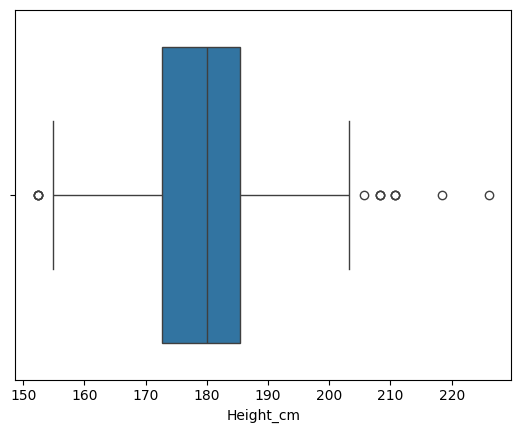

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=final_df, x='Height_cm')
plt.show()


In [85]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = final_df['Height_cm'].quantile(0.25)
Q3 = final_df['Height_cm'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows with outliers in the Height_cm column
outliers = final_df[(final_df['Height_cm'] < lower_bound) | (final_df['Height_cm'] > upper_bound)]
# final_df.head()
print(Q3)
print(Q1)
# print("Outliers in the Height_cm column:")
print(lower_bound)
print(upper_bound)
# for i in outliers:
# len(outliers)



185.42
172.72
153.67000000000002
204.46999999999997


In [86]:
final_df = final_df.drop(columns=['index']) 

In [87]:
final_df.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Acc%,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,30%,72.0,0.9,Straw Weight,30.0
1,Tecia Torres,154.94,52,60,Orthodox,4.30,47.0,3.37,62.0,0.68,15%,56.0,0.1,Straw Weight,15.0
2,Loma Lookboonmee,154.94,52,61,Orthodox,5.16,55.0,3.09,59.0,0.67,25%,72.0,0.0,Straw Weight,25.0
3,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100%,100.0,0.5,Straw Weight,100.0
4,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,35%,48.0,0.3,Straw Weight,35.0


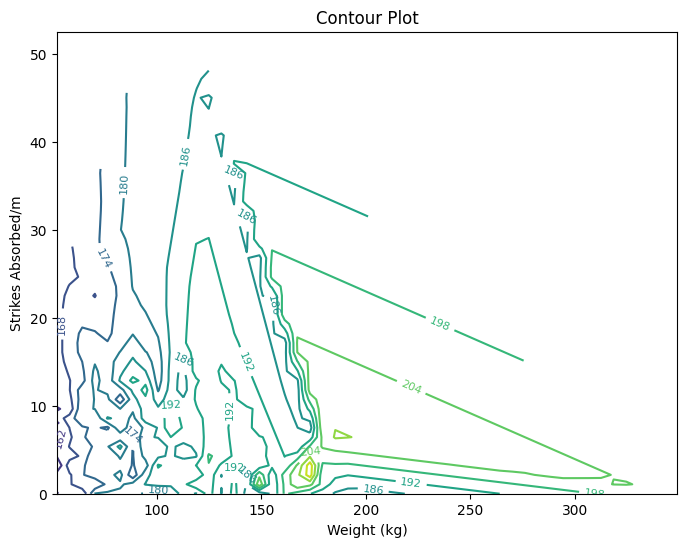

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Assuming 'final_df' is your DataFrame
x = final_df['Weight_kg']
y = final_df['Strikes_absorbed/m']
z = final_df['Height_cm']

# Create a meshgrid of the x and y values
X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 50),
                   np.linspace(y.min(), y.max(), 50))

# Interpolate the data onto the meshgrid
Z = griddata((x, y), z, (X, Y), method='linear')

# Create the contour plot
fig, ax = plt.subplots(figsize=(8, 6))
contours = ax.contour(X, Y, Z, levels=10, cmap='viridis')

# Add labels and title
ax.set_title('Contour Plot')
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Strikes Absorbed/m')
ax.clabel(contours, inline=True, fontsize=8)

plt.show()


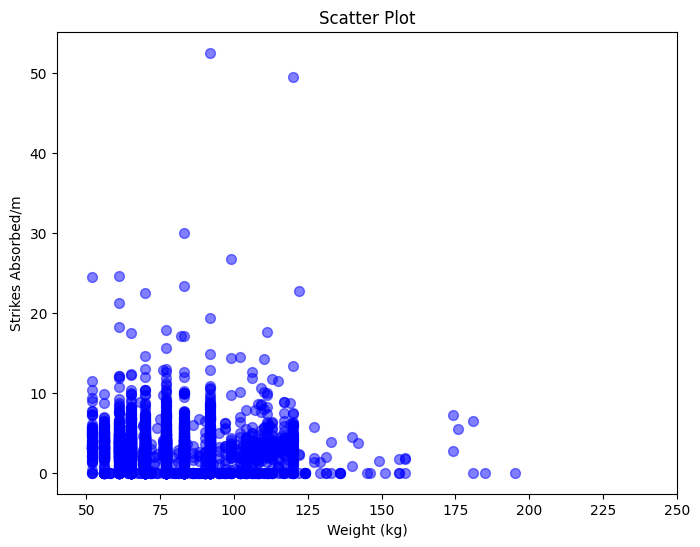

In [89]:
x = final_df['Weight_kg']
y = final_df['Strikes_absorbed/m']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, s=50, c='blue', alpha=0.5)
ax.set_xlim(40, 250)

# Add labels and title
ax.set_title('Scatter Plot')
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Strikes Absorbed/m')

plt.show()

In [90]:

WClass_list = []
for i in df_sorted['weight_class'].unique():
    WClass_list.append(i)
    print(i)


Straw Weight
Bantam Weight
Lightweight
Middleweight
Light Heavyweight
Heavyweight
Super Heavyweight


``` 
average_reach_by_class = []
something = 0
# Loop through unique weight classes in the DataFrame
for weight_class in df_sorted['weight_class'].unique():
    # Calculate the mean reach for the current weight class
    avg_reach = df_sorted[df_sorted['weight_class'] == weight_class]['Reach'].mean()
    # Fill NaN values in the 'Reach' column for the current weight class with avg_reach
    df_sorted.loc[df_sorted['weight_class'] == weight_class, 'Reach'] = df_sorted[df_sorted['weight_class'] == weight_class]['Reach'].fillna(avg_reach)
    # Append a tuple with weight class and its average reach to the list
    average_reach_by_class.append((weight_class, avg_reach))
     ```

In [91]:
most_common_stance = []
counter = 0

for i in final_df['weight_class'].unique():
    common_stance = final_df[final_df['weight_class']==i]


In [92]:
for i in final_df['weight_class'].unique():
    common_stance = final_df[final_df['weight_class'] == i]['Stance'].mode().iloc[0]
    print(common_stance)

Orthodox
Orthodox
Orthodox
Orthodox
Orthodox
Orthodox
Orthodox


### since the most common stance in all weight classes is Orthodox,
### however, weight it self is not enough for predicting the stance of fighters, we have to analys the influence of other columns on stance

In [93]:
# final_df['Stance'].fillna('Orthodox')
# final_df.head()
# final_df.describe()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fighter_name        3518 non-null   object 
 1   Height_cm           3518 non-null   float64
 2   Weight_kg           3518 non-null   int64  
 3   Reach_cm            3518 non-null   int64  
 4   Stance              2783 non-null   object 
 5   SLpM                3518 non-null   float64
 6   Str_Acc%            3518 non-null   float64
 7   Strikes_absorbed/m  3518 non-null   float64
 8   Str_Def%            3518 non-null   float64
 9   TD_Avg              3518 non-null   float64
 10  TD_Acc%             2013 non-null   object 
 11  TD_Def%             3518 non-null   float64
 12  Sub_Avg             3518 non-null   float64
 13  weight_class        3518 non-null   object 
 14  TD_Acc              3518 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 412.4+

In [94]:
final_df.isna().sum()

fighter_name             0
Height_cm                0
Weight_kg                0
Reach_cm                 0
Stance                 735
SLpM                     0
Str_Acc%                 0
Strikes_absorbed/m       0
Str_Def%                 0
TD_Avg                   0
TD_Acc%               1505
TD_Def%                  0
Sub_Avg                  0
weight_class             0
TD_Acc                   0
dtype: int64

#### dropping TD_Acc is important since almost half of its data is null

In [95]:
final_df.drop(columns=['TD_Acc%'], inplace=True)


In [96]:
final_df.isna().sum()

fighter_name            0
Height_cm               0
Weight_kg               0
Reach_cm                0
Stance                735
SLpM                    0
Str_Acc%                0
Strikes_absorbed/m      0
Str_Def%                0
TD_Avg                  0
TD_Def%                 0
Sub_Avg                 0
weight_class            0
TD_Acc                  0
dtype: int64

#### for filling stance lets use a neural network to do it

1. knowthing the features that correlates with stance
2. using those features to predict the satnce for every fighter
3. encode categorial variables
4. normalize data for more efficient processing

1. firstly lets find the correlation between stance and other variables

In [97]:
final_df_encoded = pd.get_dummies(final_df, columns=['Stance','weight_class'], drop_first=True)


In [98]:
final_df_encoded.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,...,Stance_Orthodox,Stance_Sideways,Stance_Southpaw,Stance_Switch,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Straw Weight,weight_class_Super Heavyweight
0,Felice Herrig,162.56,52,65,3.63,36.0,4.84,49.0,1.18,72.0,...,True,False,False,False,False,False,False,False,True,False
1,Tecia Torres,154.94,52,60,4.30,47.0,3.37,62.0,0.68,56.0,...,True,False,False,False,False,False,False,False,True,False
2,Loma Lookboonmee,154.94,52,61,5.16,55.0,3.09,59.0,0.67,72.0,...,True,False,False,False,False,False,False,False,True,False
3,Amanda Lemos,162.56,52,65,6.21,64.0,5.39,45.0,1.98,100.0,...,False,False,True,False,False,False,False,False,True,False
4,Carla Esparza,154.94,52,63,2.29,42.0,2.85,53.0,3.44,48.0,...,True,False,False,False,False,False,False,False,True,False


In [99]:
final_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fighter_name                    3518 non-null   object 
 1   Height_cm                       3518 non-null   float64
 2   Weight_kg                       3518 non-null   int64  
 3   Reach_cm                        3518 non-null   int64  
 4   SLpM                            3518 non-null   float64
 5   Str_Acc%                        3518 non-null   float64
 6   Strikes_absorbed/m              3518 non-null   float64
 7   Str_Def%                        3518 non-null   float64
 8   TD_Avg                          3518 non-null   float64
 9   TD_Def%                         3518 non-null   float64
 10  Sub_Avg                         3518 non-null   float64
 11  TD_Acc                          3518 non-null   float64
 12  Stance_Orthodox                 35

In [100]:
final_df_encoded = final_df_encoded.iloc[:,1:]
final_df_encoded

,Height_cm,Weight_kg,Reach_cm,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,...,Stance_Orthodox,Stance_Sideways,Stance_Southpaw,Stance_Switch,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Straw Weight,weight_class_Super Heavyweight
0,162.56,52,65,3.63,36.00,4.84,49.00,1.18,72.00,0.9,...,True,False,False,False,False,False,False,False,True,False
1,154.94,52,60,4.30,47.00,3.37,62.00,0.68,56.00,0.1,...,True,False,False,False,False,False,False,False,True,False
2,154.94,52,61,5.16,55.00,3.09,59.00,0.67,72.00,0.0,...,True,False,False,False,False,False,False,False,True,False
3,162.56,52,65,6.21,64.00,5.39,45.00,1.98,100.00,0.5,...,False,False,True,False,False,False,False,False,True,False
4,154.94,52,63,2.29,42.00,2.85,53.00,3.44,48.00,0.3,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,210.82,181,78,2.17,60.00,6.51,40.00,0.00,64.51,0.0,...,True,False,False,False,False,False,False,False,False,True
3514,187.96,181,78,0.00,44.84,0.00,45.87,0.00,64.51,0.0,...,True,False,False,False,False,False,False,False,False,True
3515,185.42,185,78,0.00,44.84,0.00,45.87,0.00,64.51,0.0,...,False,True,False,False,False,False,False,False,False,True
3516,182.88,195,78,0.00,44.84,0.00,45.87,0.00,64.51,0.0,...,True,False,False,False,False,False,False,False,False,True


In [101]:

# Create a pair plot
# sns.pairplot(final_df_encoded)
# plt.show()

In [102]:
final_df.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0
1,Tecia Torres,154.94,52,60,Orthodox,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0
2,Loma Lookboonmee,154.94,52,61,Orthodox,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0
3,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0
4,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0


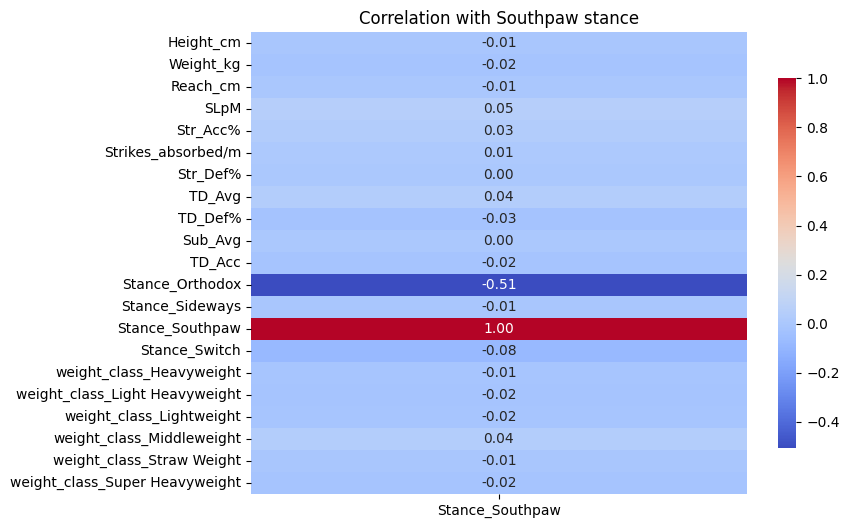

,Stance_Southpaw
Height_cm,-0.012061
Weight_kg,-0.018331
Reach_cm,-0.005596
SLpM,0.049687
Str_Acc%,0.029313
Strikes_absorbed/m,0.010455
Str_Def%,0.000994
TD_Avg,0.038743
TD_Def%,-0.026047
Sub_Avg,0.003208


In [103]:
# final_df_encoded = pd.get_dummies(final_df, columns=['Stance'], drop_first=True)

# Step 2: Calculate the correlation matrix
correlation_matrix = final_df_encoded.corr()

# Step 3: Extract the correlation values for the 'Stance_Southpaw' column
Southpaw_stance_correlation = correlation_matrix[['Stance_Southpaw']]

# Step 4: Visualize the correlation with a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(Southpaw_stance_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation with Southpaw stance')
plt.show()
Southpaw_stance_correlation

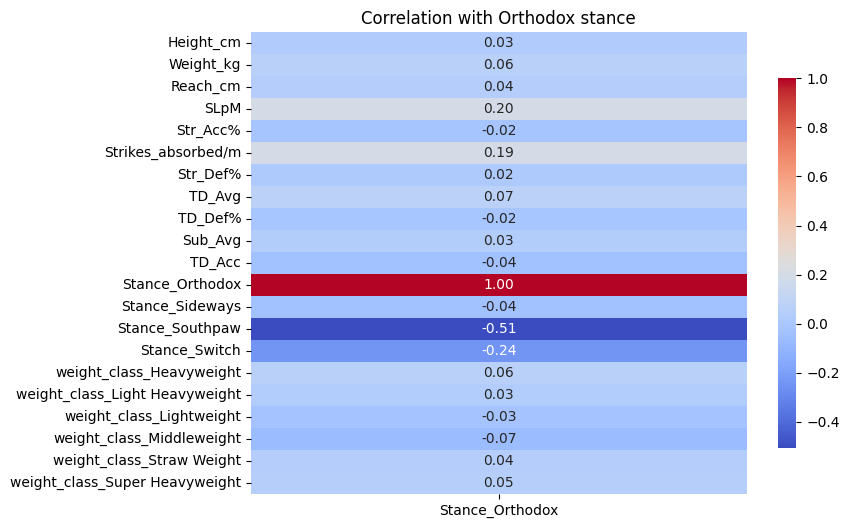

,Stance_Southpaw
Height_cm,-0.012061
Weight_kg,-0.018331
Reach_cm,-0.005596
SLpM,0.049687
Str_Acc%,0.029313
Strikes_absorbed/m,0.010455
Str_Def%,0.000994
TD_Avg,0.038743
TD_Def%,-0.026047
Sub_Avg,0.003208


In [104]:
# final_df_encoded = pd.get_dummies(final_df, columns=['Stance'], drop_first=True)

# Step 2: Calculate the correlation matrix
correlation_matrix = final_df_encoded.corr()

# Step 3: Extract the correlation values for the 'Stance Orthodox' column
Orthodox_stance_correlation = correlation_matrix[['Stance_Orthodox']]

# Step 4: Visualize the correlation with a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(Orthodox_stance_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation with Orthodox stance')
plt.show()
Southpaw_stance_correlation

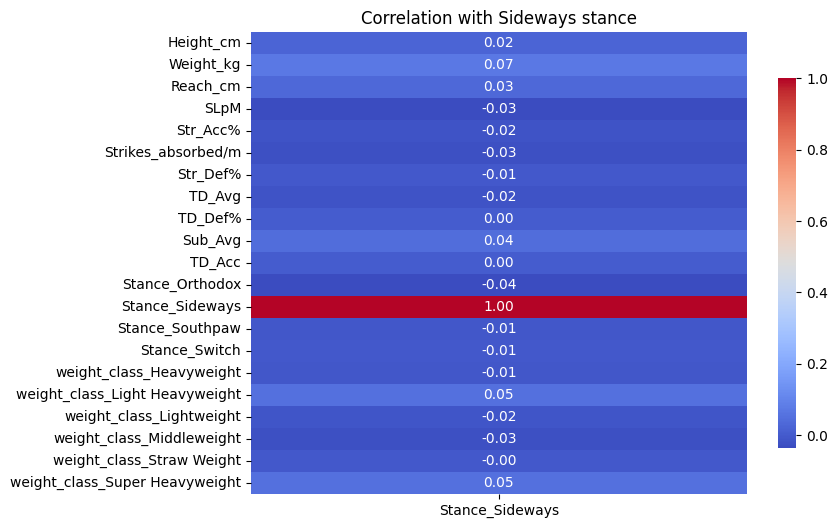

In [105]:
# final_df_encoded = pd.get_dummies(final_df, columns=['Stance'], drop_first=True)

# Step 2: Calculate the correlation matrix
correlation_matrix = final_df_encoded.corr()

# Step 3: Extract the correlation values for the 'Stance_Sideways' column
Sideways_stance_correlation = correlation_matrix[['Stance_Sideways']]

# Step 4: Visualize the correlation with a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(Sideways_stance_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation with Sideways stance')
plt.show()

In [106]:
# final_df = pd.read_csv('your_file.csv')

# Fill missing values in 'Stance' column
final_df['Stance'] = final_df['Stance'].fillna('Orthodox')

# Identify fighters with more strikes absorbed and less strikes landed as 'Orthodox'
final_df.loc[(final_df['Strikes_absorbed/m'] > final_df['SLpM']) & (final_df['Stance'] == 'Orthodox'), 'Stance'] = 'Orthodox'

# Identify fighters with less strikes absorbed and more strikes landed as 'Southpaw'
final_df.loc[(final_df['Strikes_absorbed/m'] < final_df['SLpM']) & (final_df['Stance'] == 'Orthodox'), 'Stance'] = 'Southpaw'



In [107]:
final_df.isna().sum()

fighter_name          0
Height_cm             0
Weight_kg             0
Reach_cm              0
Stance                0
SLpM                  0
Str_Acc%              0
Strikes_absorbed/m    0
Str_Def%              0
TD_Avg                0
TD_Def%               0
Sub_Avg               0
weight_class          0
TD_Acc                0
dtype: int64

In [108]:
final_df_encoded = pd.get_dummies(final_df, columns=['Stance','weight_class'], drop_first=True)


In [109]:
final_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fighter_name                    3518 non-null   object 
 1   Height_cm                       3518 non-null   float64
 2   Weight_kg                       3518 non-null   int64  
 3   Reach_cm                        3518 non-null   int64  
 4   SLpM                            3518 non-null   float64
 5   Str_Acc%                        3518 non-null   float64
 6   Strikes_absorbed/m              3518 non-null   float64
 7   Str_Def%                        3518 non-null   float64
 8   TD_Avg                          3518 non-null   float64
 9   TD_Def%                         3518 non-null   float64
 10  Sub_Avg                         3518 non-null   float64
 11  TD_Acc                          3518 non-null   float64
 12  Stance_Orthodox                 35

In [110]:
final_df_encoded.describe()

,Height_cm,Weight_kg,Reach_cm,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,TD_Acc
count,3518.000000,3518.000000,3518.000000,3518.000000,3518.000000,3518.000000,3518.000000,3518.000000,3518.000000,3518.000000,3518.000000
mean,178.625952,78.004264,72.316941,2.323198,43.276291,3.030546,51.858263,1.234107,61.159449,0.641757,46.641413
std,8.601535,18.039612,3.608807,1.894450,11.324226,2.809953,11.237175,1.924863,17.988251,1.559222,18.255726
min,152.400000,52.000000,58.000000,0.000000,4.000000,0.000000,4.000000,0.000000,5.000000,0.000000,4.000000
25%,172.720000,65.000000,69.000000,0.810000,37.000000,1.522500,47.000000,0.000000,55.000000,0.000000,39.000000
50%,180.030000,77.000000,73.000000,2.210000,43.020000,2.800000,52.020000,0.570000,60.940000,0.000000,46.000000
75%,185.420000,83.000000,75.000000,3.450000,48.000000,4.020000,58.000000,1.930000,66.000000,0.800000,50.000000
max,226.060000,349.000000,84.000000,19.910000,100.000000,52.500000,100.000000,32.140000,100.000000,21.900000,100.000000


In [111]:
final_df_encoded.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,...,Stance_Orthodox,Stance_Sideways,Stance_Southpaw,Stance_Switch,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Straw Weight,weight_class_Super Heavyweight
0,Felice Herrig,162.56,52,65,3.63,36.0,4.84,49.0,1.18,72.0,...,True,False,False,False,False,False,False,False,True,False
1,Tecia Torres,154.94,52,60,4.30,47.0,3.37,62.0,0.68,56.0,...,False,False,True,False,False,False,False,False,True,False
2,Loma Lookboonmee,154.94,52,61,5.16,55.0,3.09,59.0,0.67,72.0,...,False,False,True,False,False,False,False,False,True,False
3,Amanda Lemos,162.56,52,65,6.21,64.0,5.39,45.0,1.98,100.0,...,False,False,True,False,False,False,False,False,True,False
4,Carla Esparza,154.94,52,63,2.29,42.0,2.85,53.0,3.44,48.0,...,True,False,False,False,False,False,False,False,True,False


In [112]:
final_df.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0
1,Tecia Torres,154.94,52,60,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0
2,Loma Lookboonmee,154.94,52,61,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0
3,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0
4,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0


In [113]:
final_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fighter_name                    3518 non-null   object 
 1   Height_cm                       3518 non-null   float64
 2   Weight_kg                       3518 non-null   int64  
 3   Reach_cm                        3518 non-null   int64  
 4   SLpM                            3518 non-null   float64
 5   Str_Acc%                        3518 non-null   float64
 6   Strikes_absorbed/m              3518 non-null   float64
 7   Str_Def%                        3518 non-null   float64
 8   TD_Avg                          3518 non-null   float64
 9   TD_Def%                         3518 non-null   float64
 10  Sub_Avg                         3518 non-null   float64
 11  TD_Acc                          3518 non-null   float64
 12  Stance_Orthodox                 35

In [114]:
final_df_encoded.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,...,Stance_Orthodox,Stance_Sideways,Stance_Southpaw,Stance_Switch,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Straw Weight,weight_class_Super Heavyweight
0,Felice Herrig,162.56,52,65,3.63,36.0,4.84,49.0,1.18,72.0,...,True,False,False,False,False,False,False,False,True,False
1,Tecia Torres,154.94,52,60,4.30,47.0,3.37,62.0,0.68,56.0,...,False,False,True,False,False,False,False,False,True,False
2,Loma Lookboonmee,154.94,52,61,5.16,55.0,3.09,59.0,0.67,72.0,...,False,False,True,False,False,False,False,False,True,False
3,Amanda Lemos,162.56,52,65,6.21,64.0,5.39,45.0,1.98,100.0,...,False,False,True,False,False,False,False,False,True,False
4,Carla Esparza,154.94,52,63,2.29,42.0,2.85,53.0,3.44,48.0,...,True,False,False,False,False,False,False,False,True,False


In [115]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fighter_name        3518 non-null   object 
 1   Height_cm           3518 non-null   float64
 2   Weight_kg           3518 non-null   int64  
 3   Reach_cm            3518 non-null   int64  
 4   Stance              3518 non-null   object 
 5   SLpM                3518 non-null   float64
 6   Str_Acc%            3518 non-null   float64
 7   Strikes_absorbed/m  3518 non-null   float64
 8   Str_Def%            3518 non-null   float64
 9   TD_Avg              3518 non-null   float64
 10  TD_Def%             3518 non-null   float64
 11  Sub_Avg             3518 non-null   float64
 12  weight_class        3518 non-null   object 
 13  TD_Acc              3518 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 384.9+ KB


In [116]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)
outliers = iso.fit_predict(final_df[['Weight_kg']])
print("Outlier indices:", np.where(outliers == -1))

Outlier indices: (array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85, 3353, 3354,
       3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365,
       3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3399, 3400,
       3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3473,
       3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484,
       3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495,
       3496, 3497, 3498, 3499, 35

<Axes: ylabel='Height_cm'>

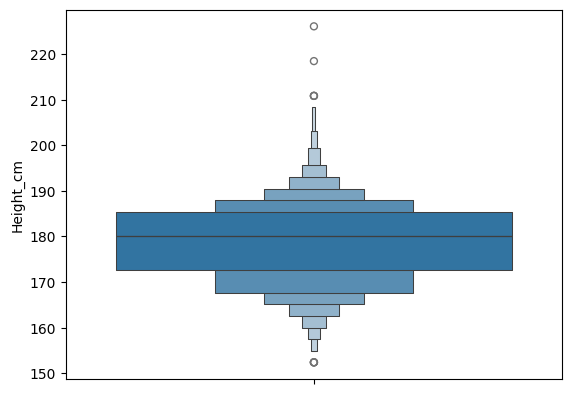

In [117]:
sns.boxenplot(final_df['Height_cm'])

<Axes: ylabel='Height_cm'>

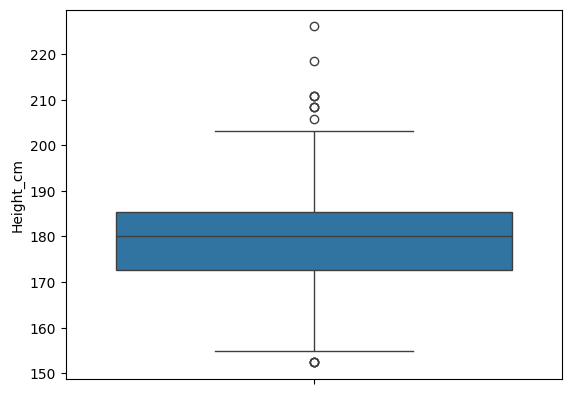

In [118]:
sns.boxplot(final_df['Height_cm'])


In [119]:
from scipy.stats import zscore

z_scores = final_df[['Height_cm', 'Weight_kg']].apply(zscore)
z_outliers = (z_scores.abs() > 3).any(axis=1)  # True if Z-score > 3
z_outliers[z_outliers == True].sum()


np.int64(36)

In [120]:
# Select only numerical columns
numerical_columns = ['Height_cm', 'Weight_kg']

# Calculate Q1, Q3, and IQR for numerical columns
Q1 = final_df[numerical_columns].quantile(0.25)
Q3 = final_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers for numerical columns only
outliers = (final_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (final_df[numerical_columns] > (Q3 + 1.5 * IQR))

# Drop rows with outliers
final_df_cleaned = final_df[~outliers.any(axis=1)]

# Check the shape of the cleaned dataset
print(f"Original dataset size: {final_df.shape[0]} rows")
print(f"Cleaned dataset size: {final_df_cleaned.shape[0]} rows")


Original dataset size: 3518 rows
Cleaned dataset size: 3282 rows


<Axes: ylabel='Weight_kg'>

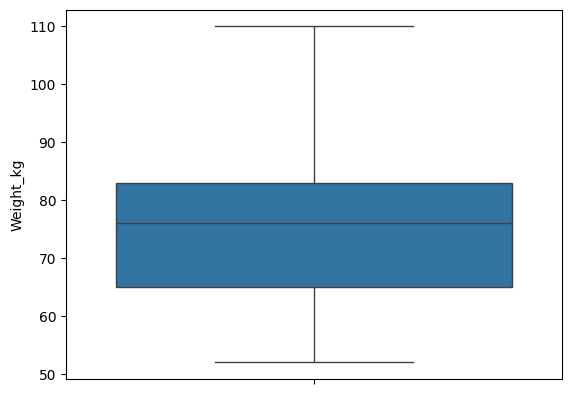

In [121]:
sns.boxplot(final_df_cleaned['Weight_kg'])

In [122]:
z_scores = (final_df_cleaned['Height_cm'] - final_df_cleaned['Height_cm'].mean()) / final_df_cleaned['Height_cm'].std()

# Identify the outliers based on a threshold (e.g., 3 standard deviations)
outliers = final_df_cleaned[np.abs(z_scores) > 3]       
outliers['Height_cm'].sum()

np.float64(0.0)

In [123]:
final_df_cleaned.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0
1,Tecia Torres,154.94,52,60,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0
2,Loma Lookboonmee,154.94,52,61,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0
3,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0
4,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0


## some visualization to understand the data overall
Insights to Look For
1. Boxplots:
Identify which weight classes have higher variability or extreme values in specific metrics.
Detect unique trends, e.g., lightweight fighters landing more strikes (SLpM).

2. Bar Charts:
Highlight which weight class averages the highest or lowest for each metric (e.g., heavyweights may absorb fewer strikes).

3. Heatmaps:
Examine which metrics have a strong positive/negative correlation with weight classes.

4. Pairplots:
Explore interdependencies between fighting metrics (e.g., SLpM vs. Strikes_absorbed/m) across weight classes.

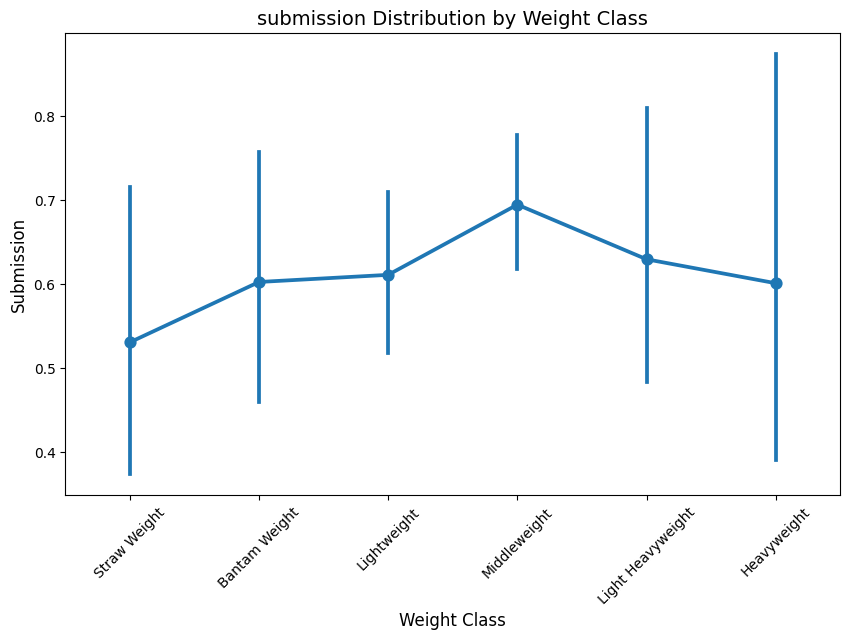

In [124]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=final_df_cleaned, x='weight_class', y='Sub_Avg')
plt.title('submission Distribution by Weight Class', fontsize=14)
plt.xlabel('Weight Class', fontsize=12)
plt.ylabel('Submission', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\H\AppData\Local\Temp\ipykernel_24024\4092758193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=final_df_cleaned, x='weight_class', y='Reach_cm', palette='muted')


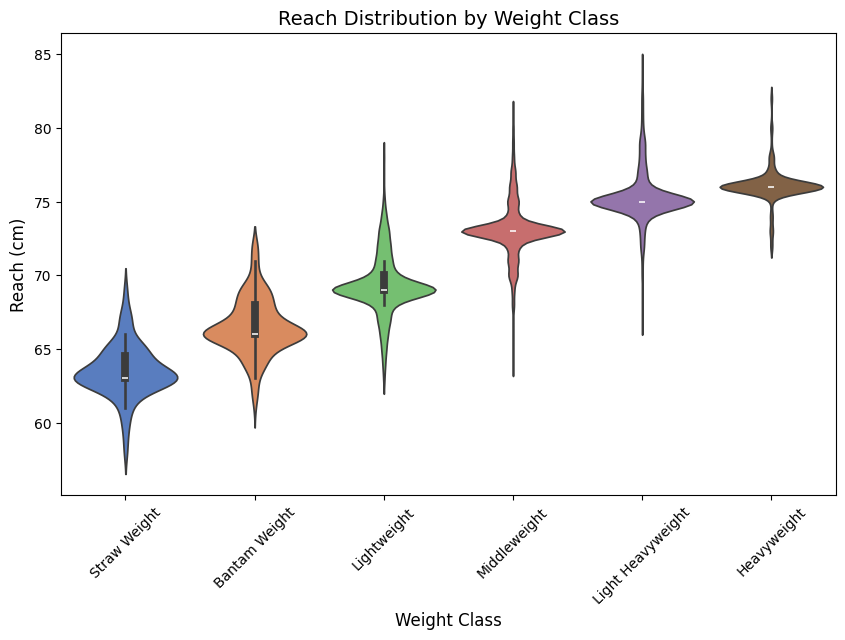

In [125]:
# Violin plot of Reach_cm by weight_class
plt.figure(figsize=(10, 6))
sns.violinplot(data=final_df_cleaned, x='weight_class', y='Reach_cm', palette='muted')
plt.title('Reach Distribution by Weight Class', fontsize=14)
plt.xlabel('Weight Class', fontsize=12)
plt.ylabel('Reach (cm)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Boxplots for Fighting Metrics by Weight Class
This will show the distribution and variation of each fighting metric across weight classes.

C:\Users\H\AppData\Local\Temp\ipykernel_24024\3569583320.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df_cleaned, x='weight_class', y=metric, palette="coolwarm")
C:\Users\H\AppData\Local\Temp\ipykernel_24024\3569583320.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df_cleaned, x='weight_class', y=metric, palette="coolwarm")
C:\Users\H\AppData\Local\Temp\ipykernel_24024\3569583320.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df_cleaned, x='weight_class', y=metric, palette="coolwarm")
C:\User

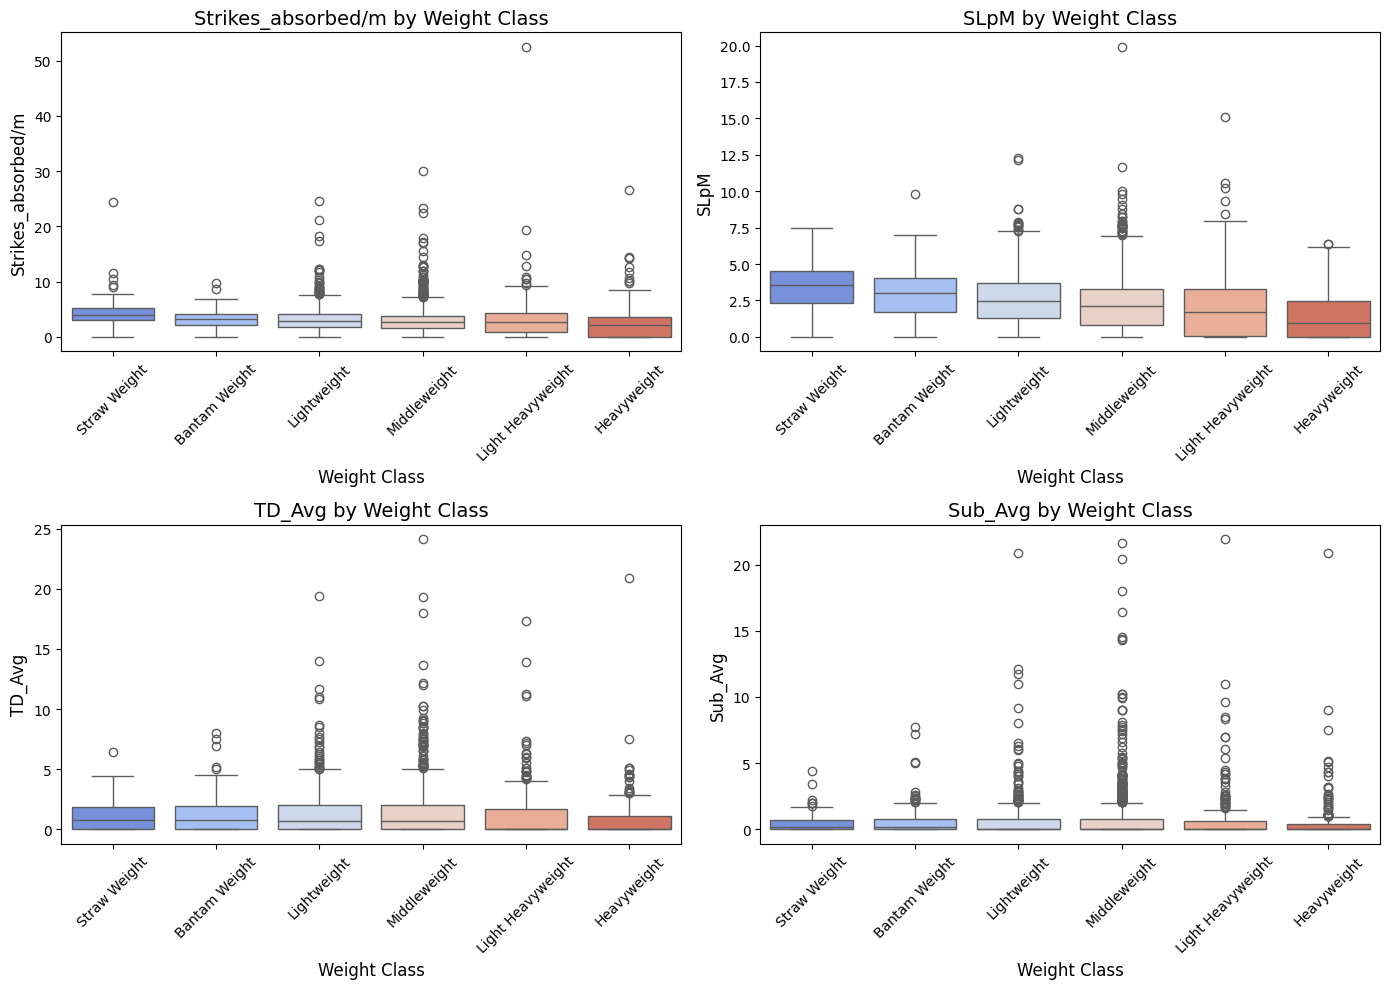

In [126]:
# Fighting metrics to visualize
metrics = ['Strikes_absorbed/m', 'SLpM', 'TD_Avg', 'Sub_Avg']

# Plot boxplots for each metric
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=final_df_cleaned, x='weight_class', y=metric, palette="coolwarm")
    plt.title(f'{metric} by Weight Class', fontsize=14)
    plt.xlabel('Weight Class', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Heatmap of Fighting Metrics Correlation with Weight Classes
This heatmap highlights how strongly fighting metrics correlate with weight classes numerically encoded.

C:\Users\H\AppData\Local\Temp\ipykernel_24024\3901020355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_cleaned['weight_class_encoded'] = le.fit_transform(final_df_cleaned['weight_class'])


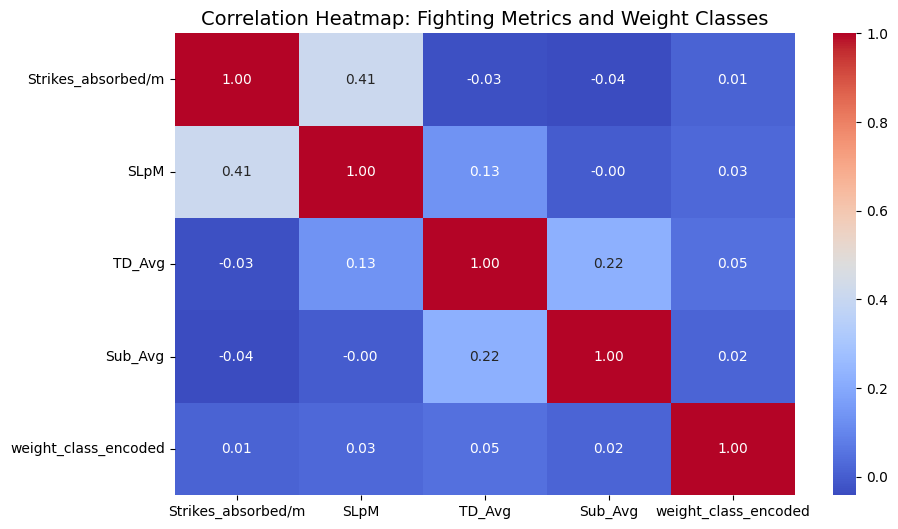

In [127]:
# Encode weight classes numerically for correlation analysis
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final_df_cleaned['weight_class_encoded'] = le.fit_transform(final_df_cleaned['weight_class'])

# Fighting metrics + encoded weight class
correlation_data = final_df_cleaned[metrics + ['weight_class_encoded']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Fighting Metrics and Weight Classes', fontsize=14)
plt.show()


### Average Fighting Metrics by Weight Class (Bar Chart)
This chart shows the average values for fighting metrics grouped by weight class.

C:\Users\H\AppData\Local\Temp\ipykernel_24024\3805379119.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_metrics, x='weight_class', y=metric, palette="viridis")
C:\Users\H\AppData\Local\Temp\ipykernel_24024\3805379119.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_metrics, x='weight_class', y=metric, palette="viridis")
C:\Users\H\AppData\Local\Temp\ipykernel_24024\3805379119.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_metrics, x='weight_class', y=metric, palette="viridis")
C:\Users\H\Ap

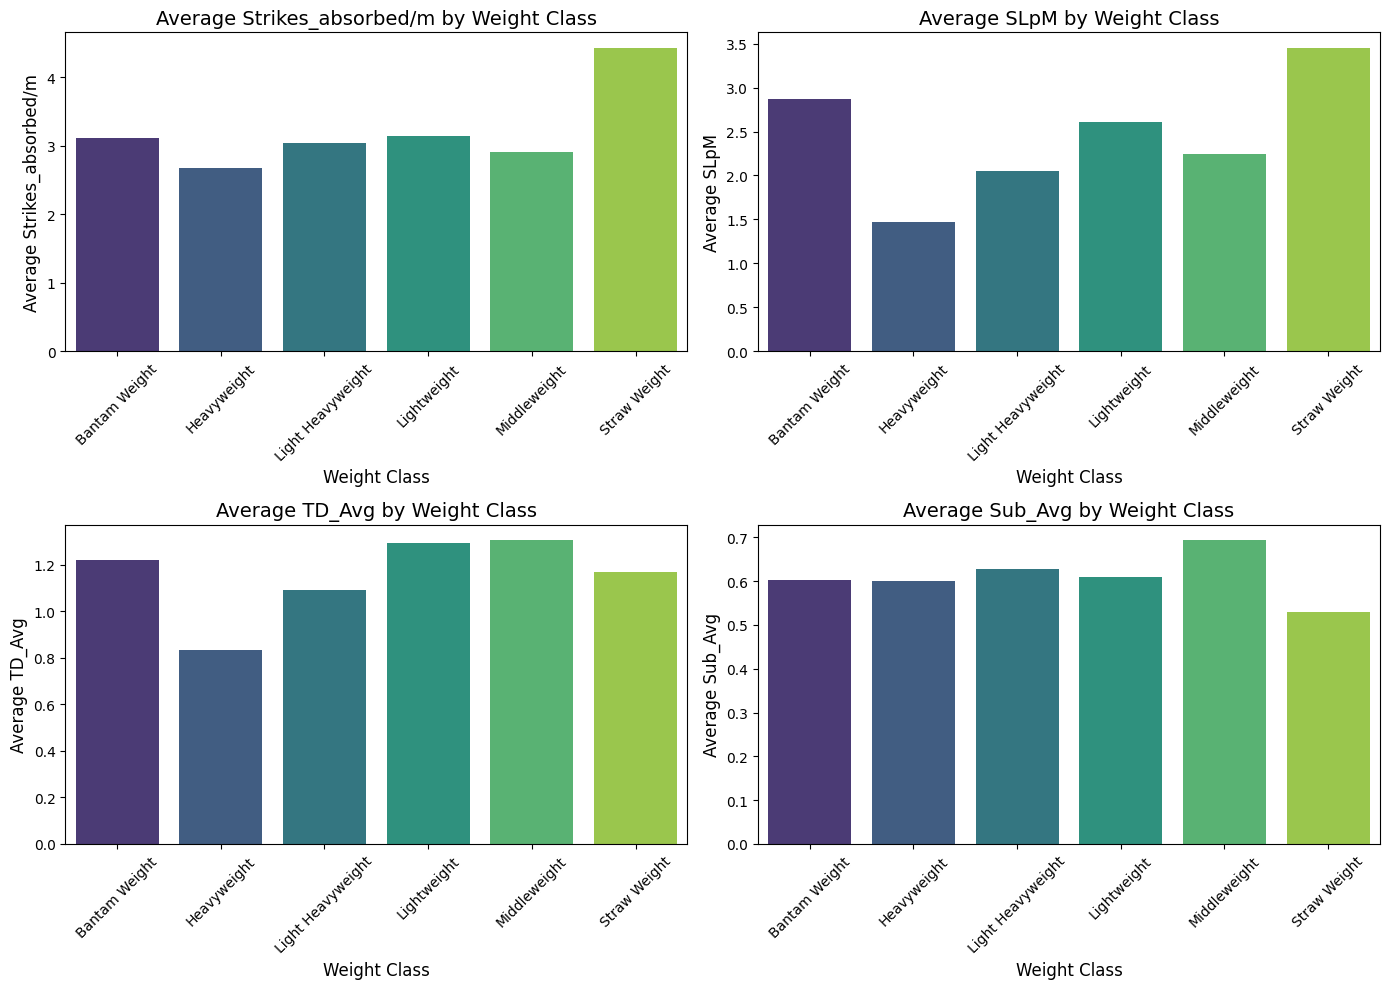

In [128]:
# Calculate averages for fighting metrics
average_metrics = final_df_cleaned.groupby('weight_class')[metrics].mean().reset_index()

# Bar chart for each metric
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=average_metrics, x='weight_class', y=metric, palette="viridis")
    plt.title(f'Average {metric} by Weight Class', fontsize=14)
    plt.xlabel('Weight Class', fontsize=12)
    plt.ylabel(f'Average {metric}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pairwise Comparisons for Fighting Metrics by Weight Class (Pairplot)
This will visually compare fighting metrics pairwise, coloring points by weight class.

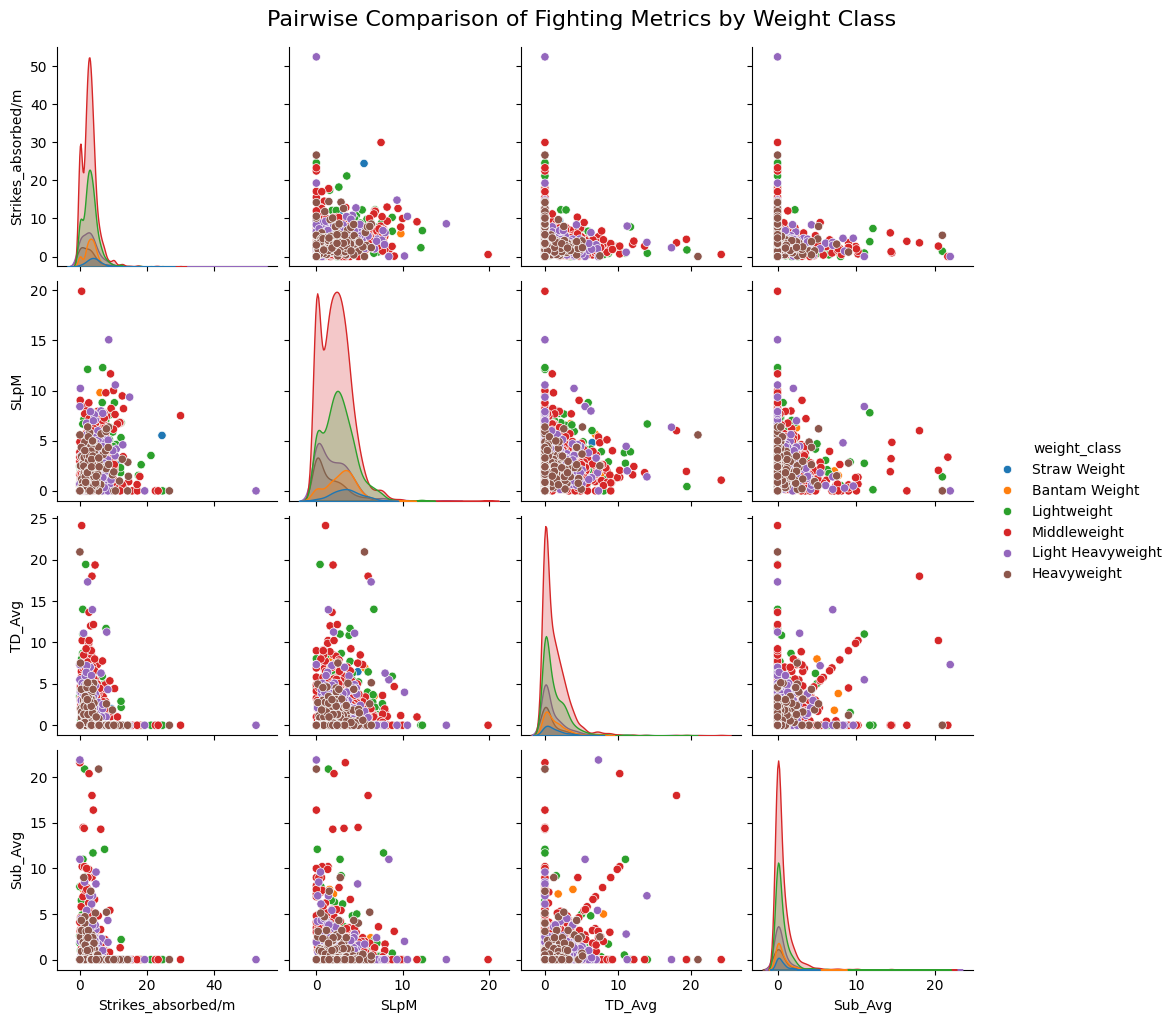

In [129]:
sns.pairplot(final_df_cleaned, vars=metrics, hue='weight_class', palette='tab10', diag_kind='kde', height=2.5)
plt.suptitle('Pairwise Comparison of Fighting Metrics by Weight Class', y=1.02, fontsize=16)
plt.show()

### Strikes Absorbed vs. Strikes Landed (Scatter Plot by Weight Class)
This visualization shows the relationship between Strikes_absorbed/m and SLpM for each weight class. This can highlight the trade-off between absorbing strikes and landing strikes.

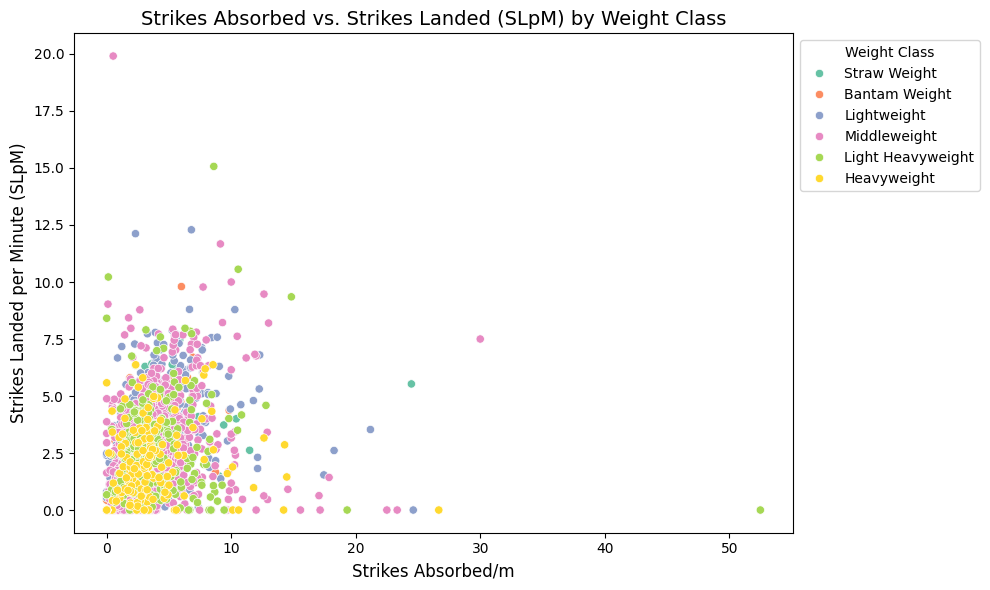

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df_cleaned, x='Strikes_absorbed/m', y='SLpM', hue='weight_class', palette='Set2')
plt.title('Strikes Absorbed vs. Strikes Landed (SLpM) by Weight Class', fontsize=14)
plt.xlabel('Strikes Absorbed/m', fontsize=12)
plt.ylabel('Strikes Landed per Minute (SLpM)', fontsize=12)
plt.legend(title='Weight Class', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Average Submission Attempts (Sub_Avg) by Weight Class (Bar Plot)
This will highlight how submission attempts (Sub_Avg) vary across different weight classes.

C:\Users\H\AppData\Local\Temp\ipykernel_24024\1280730282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_submissions, x='weight_class', y='Sub_Avg', palette='Blues')


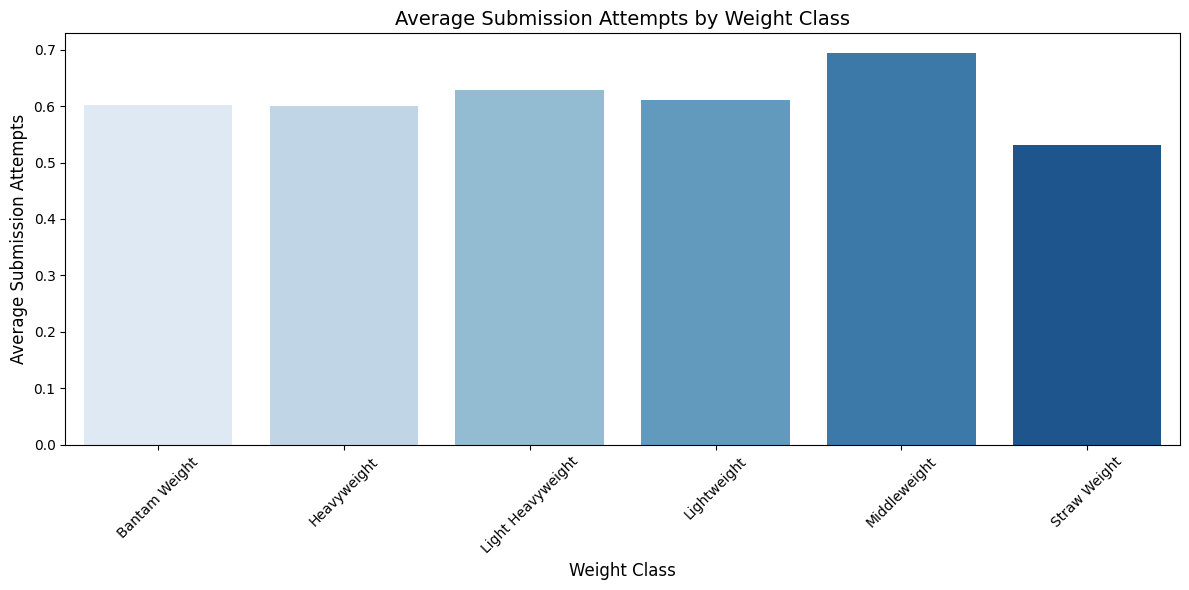

In [131]:
# Calculate average submission attempts by weight class
avg_submissions = final_df_cleaned.groupby('weight_class')['Sub_Avg'].mean().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_submissions, x='weight_class', y='Sub_Avg', palette='Blues')
plt.title('Average Submission Attempts by Weight Class', fontsize=14)
plt.xlabel('Weight Class', fontsize=12)
plt.ylabel('Average Submission Attempts', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Strike Accuracy vs. Strikes Landed per Minute (SLpM) by Stance (Violin Plot)
A violin plot will show the distribution of Str_Acc% (strike accuracy) versus SLpM by fighter stance.

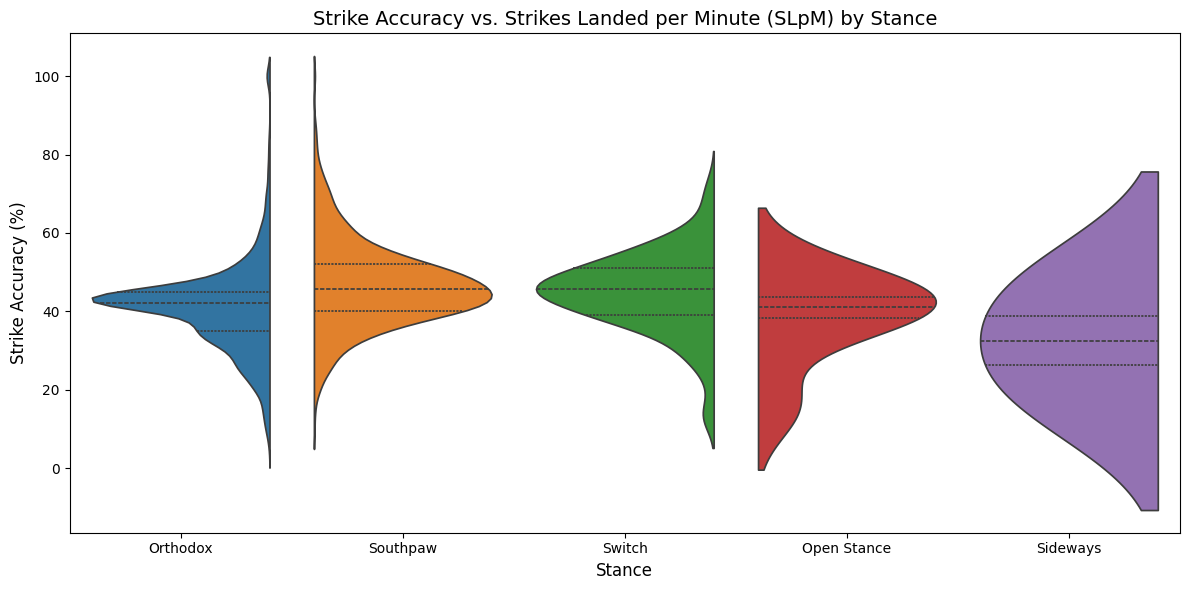

In [132]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=final_df_cleaned, x='Stance', y='Str_Acc%', hue='Stance', split=True, inner='quart')
plt.title('Strike Accuracy vs. Strikes Landed per Minute (SLpM) by Stance', fontsize=14)
plt.xlabel('Stance', fontsize=12)
plt.ylabel('Strike Accuracy (%)', fontsize=12)
plt.tight_layout()
plt.show()


##### 1: Stance vs Performance Metrics (SLpM, Strikes Absorbed per Minute, Striking Accuracy)
- Orthodox stance has the best accuracy, but lower SLpM.
- Southpaw has the highest SLpM, but lower accuracy.
- Switch stance is a good balance of both.
- Open stance trades some accuracy for higher SLpM.
- Sideways stance sacrifices accuracy for the highest SLpM.

### Average Takedowns vs. Takedown Defense by Weight Class (Bubble Plot)
This plot could show how takedown attempts (TD_Avg) and takedown defense (TD_Def%) are related across weight classes.

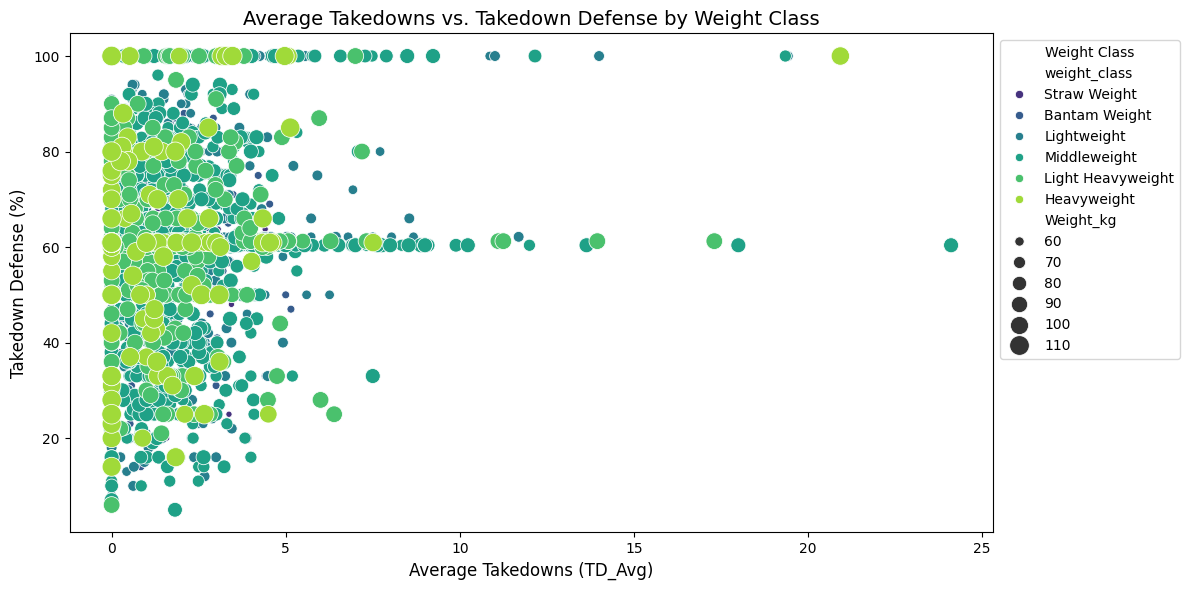

In [133]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_df_cleaned, x='TD_Avg', y='TD_Def%', hue='weight_class', size='Weight_kg', sizes=(20, 200), palette='viridis')
plt.title('Average Takedowns vs. Takedown Defense by Weight Class', fontsize=14)
plt.xlabel('Average Takedowns (TD_Avg)', fontsize=12)
plt.ylabel('Takedown Defense (%)', fontsize=12)
plt.legend(title='Weight Class', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


- The graph shows the relationship between average takedowns (TD_Avg) and takedown defense (%) across different weight classes in combat sports.
- There is a general trend where higher average takedowns are associated with lower takedown defense percentages.
- Heavier weight classes like Heavyweight and Light Heavyweight tend to have lower average takedowns but higher takedown defense.
- Lighter weight classes like Strawweight and Bantamweight have higher average takedowns but lower takedown defense.
- There is a wide range of values within each weight class, indicating that factors beyond just weight class influence a fighter's takedown and takedown defense abilities.
- Analyzing this data can help coaches and fighters understand the strengths and weaknesses of different weight classes and develop more effective training and game plans.


### Stance Distribution by Weight Class (Stacked Bar Plot)
A stacked bar plot can help visualize the distribution of stances across weight classes. This can highlight if certain weight classes are more likely to favor a particular stance.

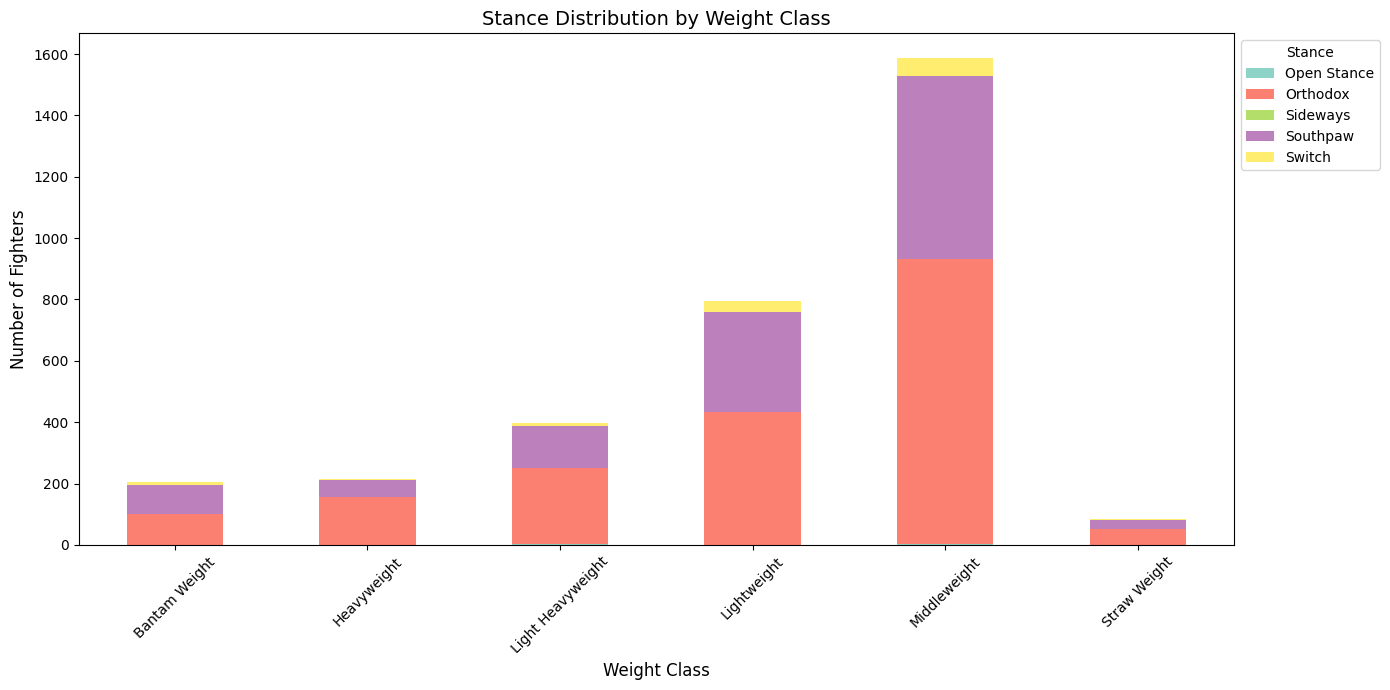

In [134]:

# Stance distribution by weight class
stance_dist = final_df_cleaned.groupby(['weight_class', 'Stance']).size().unstack().fillna(0)

# Plot stacked bar chart
stance_dist.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')
plt.title('Stance Distribution by Weight Class', fontsize=14)
plt.xlabel('Weight Class', fontsize=12)
plt.ylabel('Number of Fighters', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Stance', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


- The graph shows the distribution of different fighting stances across various weight classes in combat sports.
- The dominant stance across all weight classes is Orthodox, with the highest usage in the Middleweight and Lightweight divisions.
- Open Stance has the second highest usage, particularly in the heavier weight classes like Heavyweight and Light Heavyweight.
- Southpaw and Switch stances have relatively lower usage compared to Orthodox and Open Stance, but are still present across the weight classes.
- Sideways stance has the lowest overall usage, with the highest numbers in the Lightweight and Welterweight divisions.
- The stance distribution varies significantly by weight class, indicating that fighters may favor certain stances based on their physical attributes and fighting styles.
- Analyzing this data can help coaches and fighters understand the typical stance preferences in each weight class and develop more effective training and game plans.


### Fighter Reach vs. Height (Scatter Plot by Weight Class)
This scatter plot shows the relationship between reach (Reach_cm) and height (Height_cm), colored by weight class. It helps understand if taller fighters also have a greater reach.

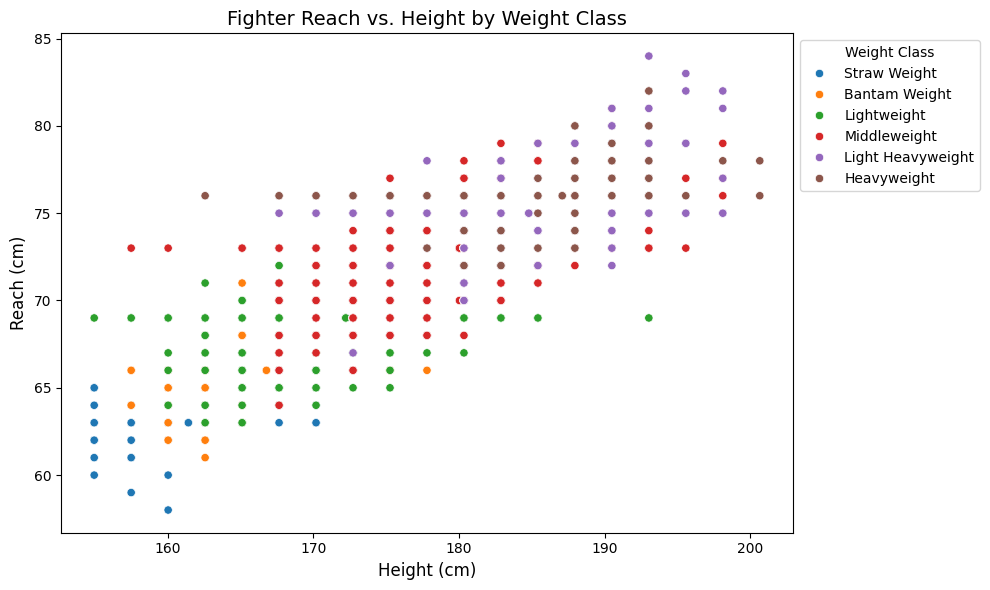

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df_cleaned, x='Height_cm', y='Reach_cm', hue='weight_class', palette='tab10')
plt.title('Fighter Reach vs. Height by Weight Class', fontsize=14)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Reach (cm)', fontsize=12)
plt.legend(title='Weight Class', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


- The graph shows the relationship between fighter reach (in cm) and height (in cm) across different weight classes in combat sports.
- There is a general positive correlation between fighter height and reach, with taller fighters typically having longer reaches.
- The weight classes are clearly separated, with the heavier weight classes (Heavyweight, Light Heavyweight, Middleweight) occupying the upper right portion of the graph, indicating greater heights and reaches.
- The lighter weight classes (Bantamweight, Strawweight) are clustered towards the bottom left, with shorter heights and shorter reaches.
- There is some overlap between adjacent weight classes, suggesting that height and reach are not the only factors determining a fighter's weight class.
- Analyzing this data can help coaches and fighters understand the physical attributes associated with different weight classes and develop more effective training and strategy based on their own physical profile.


# Neural networks
    

In [136]:
final_df.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class,TD_Acc
0,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0
1,Tecia Torres,154.94,52,60,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0
2,Loma Lookboonmee,154.94,52,61,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0
3,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0
4,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0


In [137]:
Match_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Columns: 162 entries, name_red to R_Stance_Switch
dtypes: bool(1), float64(106), int64(52), object(3)
memory usage: 7.3+ MB


In [138]:
Match_data2.head()

,name_red,name_blue,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Adrian Yanez,Gustavo Lopez,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,...,0,1,0,0,0,0,1,0,0,0
1,Trevin Giles,Roman Dolidze,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,...,0,1,0,0,0,0,1,0,0,0
2,Tai Tuivasa,Harry Hunsucker,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,...,0,1,0,0,0,0,0,0,1,0
3,Cheyanne Buys,Montserrat Conejo,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,...,0,0,0,1,0,0,0,0,0,1
4,Marion Reneau,Macy Chiasson,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,...,0,1,0,0,0,0,1,0,0,0


In [139]:
final_df_encoded.to_csv('final_encoded.csv')

In [140]:
final_df.to_csv('final_df.csv')

In [141]:
Match_data2.to_csv('Match_data2.csv')

In [142]:
Match_data2.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,...,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,0.193739,0.135246,0.452788,0.432788,0.282610,0.252897,0.400956,0.335873,0.120343,0.108563,...,0.001525,0.764825,0.000678,0.193155,0.039817,0.002542,0.759065,0.000339,0.205015,0.033040
std,0.346475,0.294238,0.114325,0.116189,0.239811,0.235253,0.648117,0.586483,0.307538,0.289504,...,0.039024,0.424144,0.026027,0.394807,0.195546,0.050354,0.427687,0.018407,0.403747,0.178755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.401611,0.376250,0.100000,0.082733,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.250000,0.093750,0.500000,0.480000,0.395828,0.330000,0.500000,0.500000,0.031250,0.007820,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
